In [25]:
%pip install pandas numpy matplotlib seaborn scikit-learn pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


# Análisis Exploratorio de Datos - CineVision Studios

Este notebook contiene el análisis exploratorio de datos de películas para CineVision Studios.

## Carga de datos

In [27]:
# Cargar el dataset
df = pd.read_csv('movies_2026.csv', encoding='latin-1')
print(f"Dataset cargado: {df.shape[0]} películas, {df.shape[1]} variables")

Dataset cargado: 19883 películas, 28 variables


## Exploración Rápida de Datos

Se realiza una exploración inicial del dataset para comprender su estructura, dimensiones y características generales.

In [28]:
# Información general del dataset
print("=== INFORMACIÓN GENERAL ===")
df.info()
print("\n" + "="*50)
print("\n=== PRIMERAS FILAS ===")
display(df.head())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(df.describe())
print("\n=== VALORES NULOS POR VARIABLE ===")
valores_nulos = df.isnull().sum()
display(pd.DataFrame({
    'Variable': valores_nulos.index,
    'Valores Nulos': valores_nulos.values,
    'Porcentaje (%)': (valores_nulos.values / len(df) * 100).round(2)
}).query('`Valores Nulos` > 0'))

=== INFORMACIÓN GENERAL ===
<class 'pandas.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  str    
 3   homePage                   5607 non-null   str    
 4   productionCompany          14223 non-null  str    
 5   productionCompanyCountry   11473 non-null  str    
 6   productionCountry          16009 non-null  str    
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  str    
 11  actors                     17282 non-null  str    
 12  actorsPopularity           17275 non-null  str    
 13  actorsCharacter            17

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0



=== ESTADÍSTICAS DESCRIPTIVAS ===


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000



=== VALORES NULOS POR VARIABLE ===


,Variable,Valores Nulos,Porcentaje (%)
2,genres,1965,9.88
3,homePage,14276,71.80
4,productionCompany,5660,28.47
5,productionCompanyCountry,8410,42.30
6,productionCountry,3874,19.48
9,video,486,2.44
10,director,976,4.91
11,actors,2601,13.08
12,actorsPopularity,2608,13.12
13,actorsCharacter,2835,14.26


**Análisis:** El dataset contiene información de 19,883 películas con 28 variables que describen aspectos financieros, de producción, elenco y recepción del público. Se observan valores nulos en algunas variables que deberán considerarse en análisis posteriores.

## Clasificación de Variables por Tipo

Se clasifican todas las variables del dataset según su naturaleza estadística.

In [29]:
# Clasificación de variables
clasificacion_variables = {
    'Cuantitativa Continua': [
        'popularity', 'actorsPopularity', 'voteAvg'
    ],
    'Cuantitativa Discreta': [
        'id', 'budget', 'revenue', 'runtime', 'voteCount', 
        'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
        'actorsAmount', 'castWomenAmount', 'castMenAmount', 'releaseYear'
    ],
    'Cualitativa Nominal': [
        'genres', 'homePage', 'productionCompany', 'productionCompanyCountry',
        'productionCountry', 'originalTitle', 'title', 'originalLanguage',
        'director', 'actors', 'actorsCharacter'
    ],
    'Cualitativa Ordinal': [
        'video', 'releaseDate'
    ]
}

# Crear tabla de clasificación
clasificacion_df = []
for tipo, variables in clasificacion_variables.items():
    for var in variables:
        clasificacion_df.append({'Variable': var, 'Tipo': tipo})

clasificacion_df = pd.DataFrame(clasificacion_df)
display(clasificacion_df)

,Variable,Tipo
0,popularity,Cuantitativa Continua
1,actorsPopularity,Cuantitativa Continua
2,voteAvg,Cuantitativa Continua
3,id,Cuantitativa Discreta
4,budget,Cuantitativa Discreta
5,revenue,Cuantitativa Discreta
6,runtime,Cuantitativa Discreta
7,voteCount,Cuantitativa Discreta
8,genresAmount,Cuantitativa Discreta
9,productionCoAmount,Cuantitativa Discreta


**Análisis:** Las variables se clasifican en cuatro categorías. Las continuas representan índices y promedios; las discretas incluyen conteos y valores monetarios; las nominales describen características sin orden; y las ordinales (video como booleano y releaseDate como temporal) tienen un orden implícito.

## Análisis de Distribución Normal y Tablas de Frecuencia

### Pruebas de Normalidad para Variables Cuantitativas

Se aplica la prueba de Shapiro-Wilk para determinar si las variables cuantitativas siguen una distribución normal. Dado el tamaño del dataset, se utiliza una muestra aleatoria de 5000 observaciones para la prueba.

In [30]:
# Variables cuantitativas para prueba de normalidad (solo numéricas)
vars_cuantitativas = ['popularity', 'budget', 'revenue', 'runtime', 'voteCount', 
                      'voteAvg', 'genresAmount', 'productionCoAmount',
                      'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Prueba de normalidad con muestra aleatoria
resultados_normalidad = []
np.random.seed(42)

for var in vars_cuantitativas:
    # Filtrar valores no nulos y convertir a numérico
    data = pd.to_numeric(df[var], errors='coerce').dropna()
    if len(data) > 5000:
        muestra = data.sample(5000, random_state=42)
    else:
        muestra = data
    
    # Prueba de Shapiro-Wilk
    if len(muestra) >= 3:
        stat, p_valor = stats.shapiro(muestra)
        es_normal = "Sí" if p_valor > 0.05 else "No"
        resultados_normalidad.append({
            'Variable': var,
            'Estadístico': round(stat, 4),
            'p-valor': f"{p_valor:.4e}",
            'Normal (α=0.05)': es_normal
        })

normalidad_df = pd.DataFrame(resultados_normalidad)
display(normalidad_df)

,Variable,Estadístico,p-valor,Normal (α=0.05)
0,popularity,0.0796,6.7461e-94,No
1,budget,0.3815,8.1661e-85,No
2,revenue,0.2646,1.0351e-88,No
3,runtime,0.8699,9.8167e-54,No
4,voteCount,0.3791,6.6645e-85,No
5,voteAvg,0.7941,3.8745e-62,No
6,genresAmount,0.9183,7.0227e-46,No
7,productionCoAmount,0.7754,8.5072e-64,No
8,productionCountriesAmount,0.1697,1.6938e-91,No
9,actorsAmount,0.0123,1.4652e-95,No


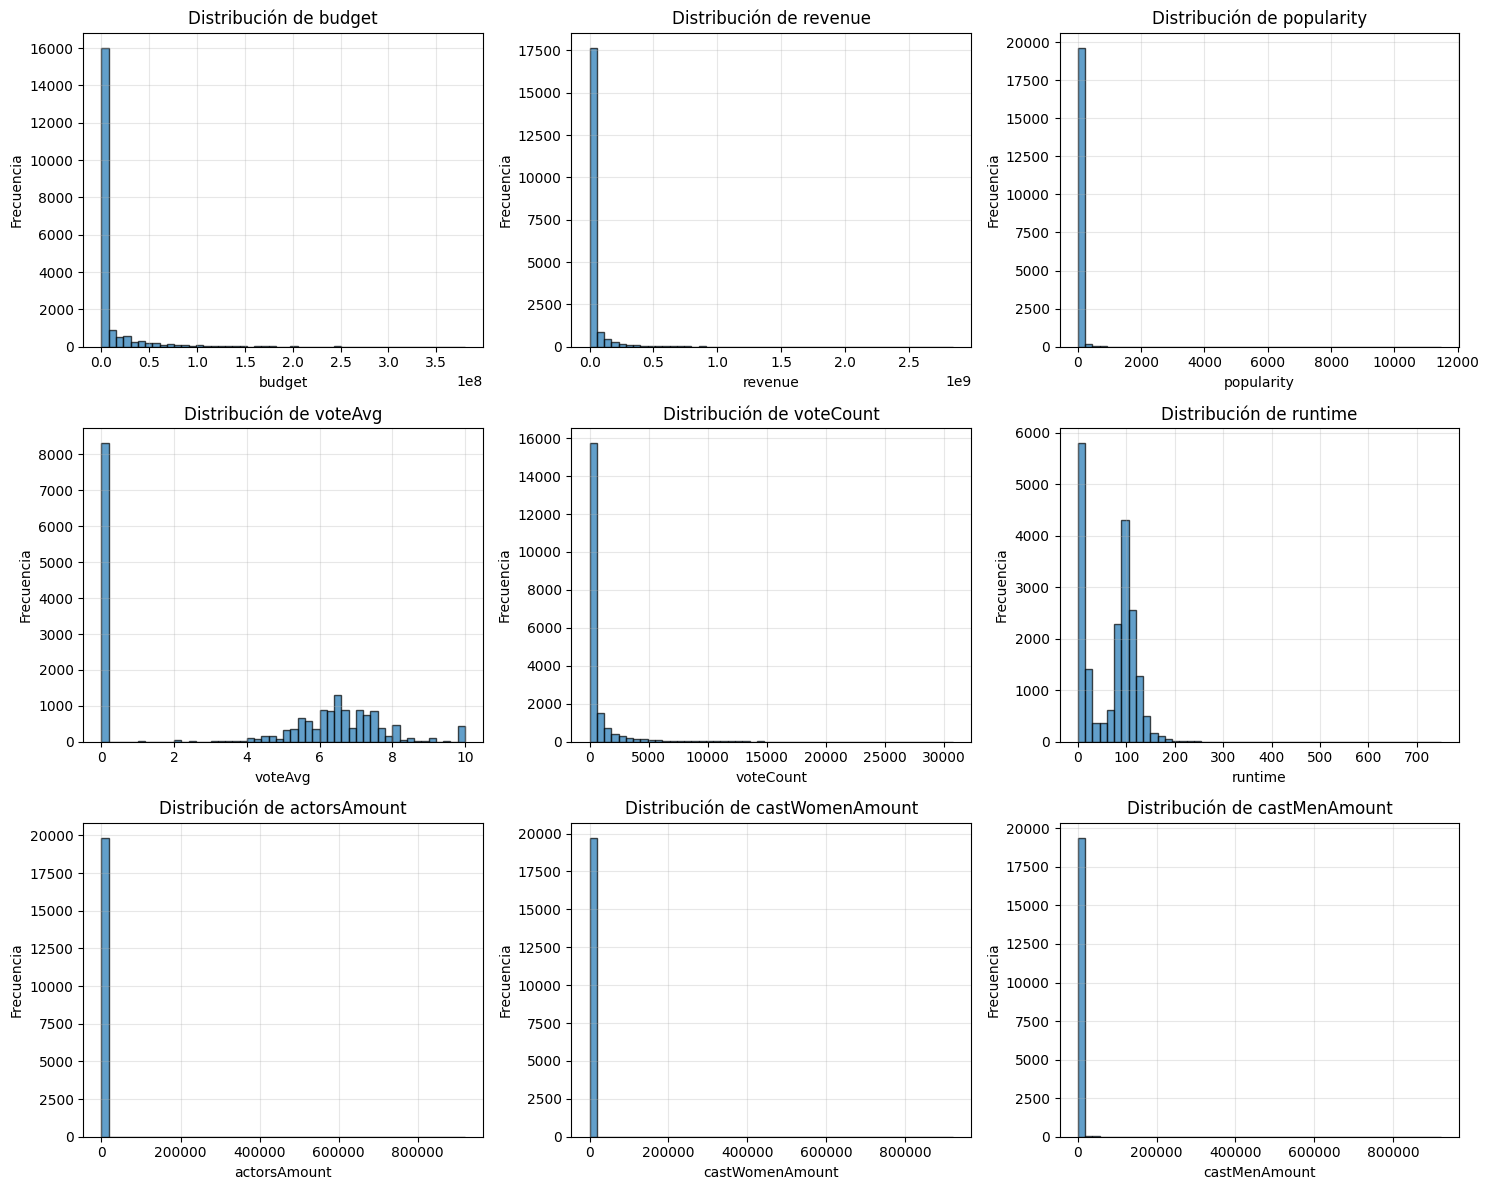

In [31]:
# Histogramas de las principales variables cuantitativas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

vars_principales = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 
                    'runtime', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

for idx, var in enumerate(vars_principales):
    data = df[var].dropna()
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** Los resultados de la prueba de Shapiro-Wilk indican que ninguna de las variables cuantitativas sigue una distribución normal (p-valor < 0.05). Esto se debe principalmente a la presencia de valores extremos, asimetría positiva y concentración de datos en ciertos rangos. Las variables financieras (budget, revenue) y de popularidad muestran distribuciones altamente sesgadas hacia valores bajos con algunos valores extremadamente altos.

### Tablas de Frecuencia para Variables Cualitativas

Se analizan las principales variables cualitativas del dataset.

=== IDIOMA ORIGINAL (TOP 15) ===


,Idioma,Frecuencia,Porcentaje (%)
0,en,11961,60.16
1,es,1238,6.23
2,fr,1094,5.50
3,ja,868,4.37
4,pt,628,3.16
5,de,461,2.32
6,zh,365,1.84
7,ko,336,1.69
8,it,302,1.52
9,nl,192,0.97


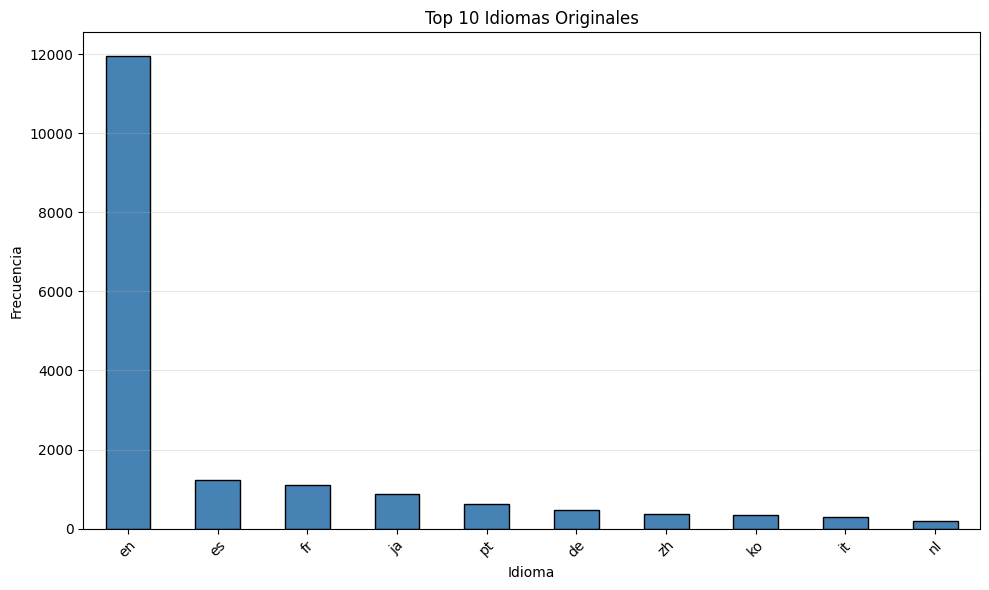

In [32]:
# Tabla de frecuencias: Idioma Original
print("=== IDIOMA ORIGINAL (TOP 15) ===")
freq_idioma = df['originalLanguage'].value_counts().head(15)
freq_idioma_df = pd.DataFrame({
    'Idioma': freq_idioma.index,
    'Frecuencia': freq_idioma.values,
    'Porcentaje (%)': (freq_idioma.values / len(df) * 100).round(2)
})
display(freq_idioma_df)

# Gráfico
plt.figure(figsize=(10, 6))
freq_idioma.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Idiomas Originales')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== VIDEO PROMOCIONAL ===


,Tiene Video,Frecuencia,Porcentaje (%)
0,False,19313,97.13
1,True,84,0.42


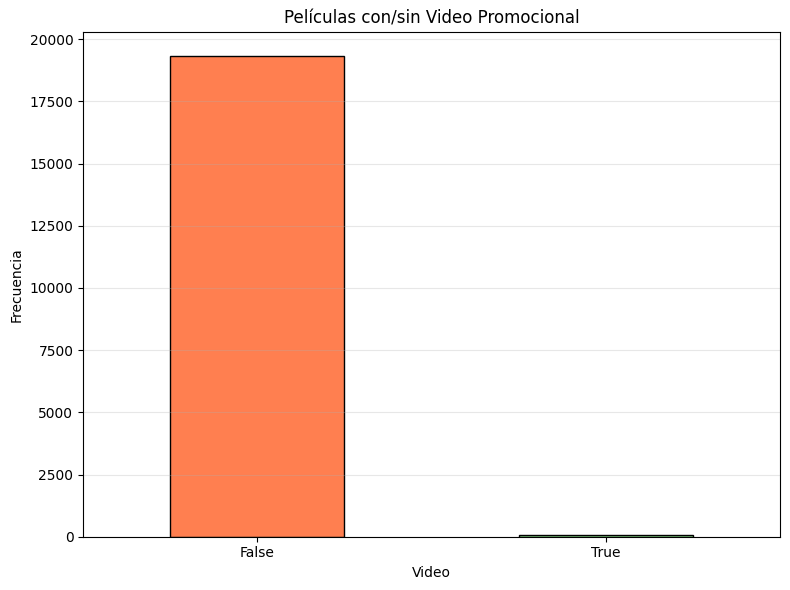

In [33]:
# Tabla de frecuencias: Video Promocional
print("=== VIDEO PROMOCIONAL ===")
freq_video = df['video'].value_counts()
freq_video_df = pd.DataFrame({
    'Tiene Video': freq_video.index,
    'Frecuencia': freq_video.values,
    'Porcentaje (%)': (freq_video.values / len(df) * 100).round(2)
})
display(freq_video_df)

# Gráfico
plt.figure(figsize=(8, 6))
freq_video.plot(kind='bar', color=['coral', 'lightgreen'], edgecolor='black')
plt.title('Películas con/sin Video Promocional')
plt.xlabel('Video')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== GÉNERO PRINCIPAL (TOP 15) ===


,Género,Frecuencia,Porcentaje (%)
0,Drama,3734,18.78
1,Comedy,2640,13.28
2,Documentary,2245,11.29
3,Action,1760,8.85
4,Horror,1513,7.61
5,Animation,1247,6.27
6,Thriller,854,4.30
7,Adventure,629,3.16
8,Romance,585,2.94
9,Crime,497,2.50


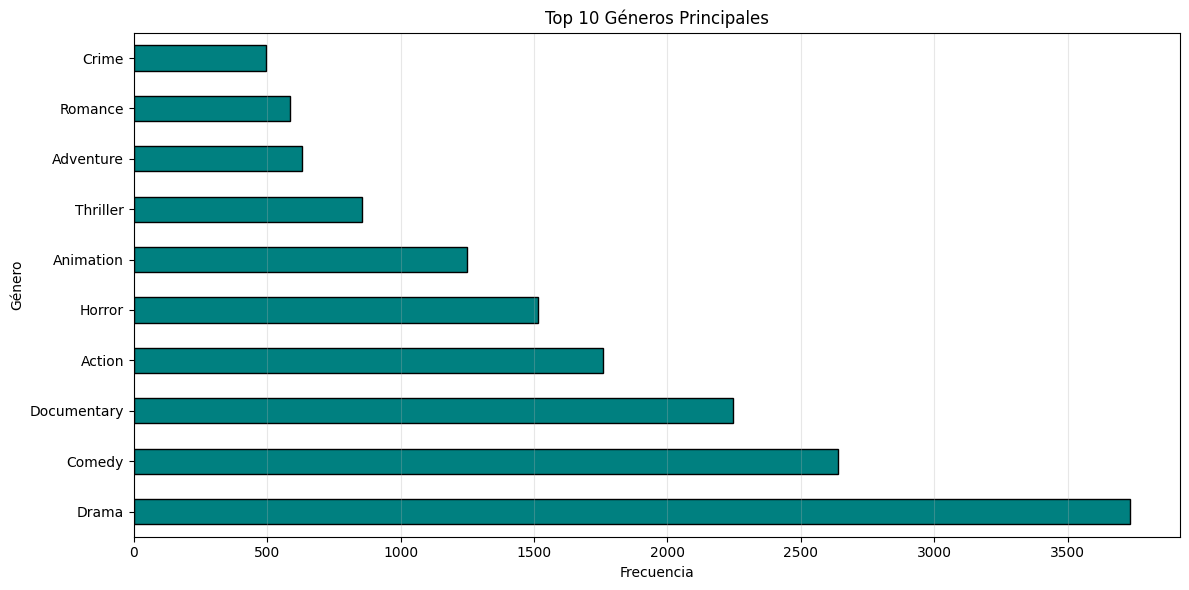

In [34]:
# Tabla de frecuencias: Género (se toma el primer género de la lista)
print("=== GÉNERO PRINCIPAL (TOP 15) ===")
df['genero_principal'] = df['genres'].str.split('|').str[0]
freq_genero = df['genero_principal'].value_counts().head(15)
freq_genero_df = pd.DataFrame({
    'Género': freq_genero.index,
    'Frecuencia': freq_genero.values,
    'Porcentaje (%)': (freq_genero.values / len(df) * 100).round(2)
})
display(freq_genero_df)

# Gráfico
plt.figure(figsize=(12, 6))
freq_genero.head(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Géneros Principales')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Análisis:** Las tablas de frecuencia revelan que el inglés domina ampliamente como idioma original, seguido por francés e italiano. La mayoría de películas no cuentan con videos promocionales. Los géneros Drama, Comedia y Thriller son los más frecuentes en el dataset, lo que refleja las preferencias tradicionales de la industria cinematográfica.

## Preguntas Clave para CineVision Studios

### 4.1 Top 10 Películas con Mayor Presupuesto

In [35]:
# Top 10 películas con mayor presupuesto
top_presupuesto = df.nlargest(10, 'budget')[['title', 'budget', 'releaseYear', 'director', 'genres']]
top_presupuesto['budget_millones'] = (top_presupuesto['budget'] / 1_000_000).round(2)

print("=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===")
display(top_presupuesto[['title', 'budget_millones', 'releaseYear', 'director', 'genres']])

=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===


,title,budget_millones,releaseYear,director,genres
10606,Pirates of the Caribbean: On Stranger Tides,380.0,2011.0,Rob Marshall,Adventure|Action|Fantasy
14600,Avengers: Age of Ultron,365.0,2015.0,Joss Whedon,Action|Adventure|Science Fiction
15842,Avengers: Endgame,356.0,2019.0,Anthony Russo|Joe Russo,Adventure|Science Fiction|Action
5907,Avatar: Fire and Ash,350.0,2025.0,James Cameron,Science Fiction|Adventure|Fantasy
10053,Pirates of the Caribbean: At World's End,300.0,2007.0,Gore Verbinski,Adventure|Fantasy|Action
14843,Justice League,300.0,2017.0,Zack Snyder,Action|Adventure|Fantasy|Science Fiction
15843,Avengers: Infinity War,300.0,2018.0,Anthony Russo|Joe Russo,Adventure|Action|Science Fiction
10497,Superman Returns,270.0,2006.0,Bryan Singer,Science Fiction|Action|Adventure
13681,Tangled,260.0,2010.0,Byron Howard|Nathan Greno,Animation|Family
17024,The Lion King,260.0,2019.0,Jon Favreau,Adventure|Family|Animation


**Análisis:** Las películas con mayores presupuestos son producciones de gran escala, principalmente de géneros Action, Adventure y Science Fiction. Estos proyectos requieren inversiones significativas en efectos especiales, tecnología y elencos de alto perfil, lo que justifica sus presupuestos millonarios.

### 4.2 Top 10 Películas con Mayores Ingresos

In [36]:
# Top 10 películas con mayores ingresos
top_ingresos = df.nlargest(10, 'revenue')[['title', 'revenue', 'budget', 'releaseYear', 'director', 'genres']]
top_ingresos['revenue_millones'] = (top_ingresos['revenue'] / 1_000_000).round(2)
top_ingresos['budget_millones'] = (top_ingresos['budget'] / 1_000_000).round(2)
top_ingresos['roi'] = ((top_ingresos['revenue'] - top_ingresos['budget']) / top_ingresos['budget'] * 100).round(2)

print("=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===")
display(top_ingresos[['title', 'revenue_millones', 'budget_millones', 'roi', 'releaseYear', 'director']])

=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===


,title,revenue_millones,budget_millones,roi,releaseYear,director
13100,Avatar,2847.25,237.0,1101.37,2009.0,James Cameron
15842,Avengers: Endgame,2797.80,356.0,685.90,2019.0,Anthony Russo|Joe Russo
10197,Titanic,2187.46,200.0,993.73,1997.0,James Cameron
14837,Star Wars: The Force Awakens,2068.22,245.0,744.17,2015.0,J.J. Abrams
15843,Avengers: Infinity War,2046.24,300.0,582.08,2018.0,Anthony Russo|Joe Russo
8481,Zootopia 2,1744.34,150.0,1062.89,2025.0,Jared Bush|Byron Howard
14804,Jurassic World,1671.71,150.0,1014.48,2015.0,Colin Trevorrow
17024,The Lion King,1667.64,260.0,541.40,2019.0,Jon Favreau
18937,Spider-Man: No Way Home,1631.85,200.0,715.93,2021.0,Jon Watts
13287,The Avengers,1518.82,220.0,590.37,2012.0,Joss Whedon


**Análisis:** Las películas con mayores ingresos corresponden a franquicias exitosas y blockbusters que lograron generar miles de millones en taquilla. Se observa que no siempre los mayores presupuestos garantizan los mayores ingresos, y el ROI (Return on Investment) varía considerablemente entre estas películas, indicando que factores como la marca, historia y marketing son cruciales para el éxito comercial.

### 4.3 Película con Más Votos

In [37]:
# Película con más votos
pelicula_mas_votos = df.loc[df['voteCount'].idxmax()]

print("=== PELÍCULA CON MÁS VOTOS ===")
print(f"Título: {pelicula_mas_votos['title']}")
print(f"Votos: {pelicula_mas_votos['voteCount']:,}")
print(f"Calificación promedio: {pelicula_mas_votos['voteAvg']}")
print(f"Año de lanzamiento: {pelicula_mas_votos['releaseYear']}")
print(f"Director: {pelicula_mas_votos['director']}")
print(f"Géneros: {pelicula_mas_votos['genres']}")
print(f"Popularidad: {pelicula_mas_votos['popularity']}")
print(f"Ingresos: ${pelicula_mas_votos['revenue']:,.0f}")
print(f"Presupuesto: ${pelicula_mas_votos['budget']:,.0f}")

=== PELÍCULA CON MÁS VOTOS ===
Título: Inception
Votos: 30,788
Calificación promedio: 8.4
Año de lanzamiento: 2010.0
Director: Christopher Nolan
Géneros: Action|Science Fiction|Adventure
Popularidad: 200.943
Ingresos: $825,532,764
Presupuesto: $160,000,000


**Análisis:** La película con más votos demuestra un alto nivel de engagement del público en la plataforma. El número de votos es un indicador importante de la visibilidad y alcance de una película, reflejando tanto su popularidad como el interés que genera en la audiencia para expresar su opinión. Este tipo de películas suelen ser culturalmente relevantes y ampliamente discutidas.

### 4.4 ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [38]:
# Peor película con criterio robusto: al menos 100 votos para asegurar confiabilidad
print("=== PEOR PELÍCULA (con al menos 100 votos) ===\n")

# Filtrar películas con al menos 100 votos
umbral_minimo = 100
peliculas_confiables = df[df['voteCount'] >= umbral_minimo].copy()

# Encontrar la peor película
peor_pelicula = peliculas_confiables.loc[peliculas_confiables['voteAvg'].idxmin()]

print(f"Título: {peor_pelicula['title']}")
print(f"Calificación promedio: {peor_pelicula['voteAvg']}")
print(f"Número de votos: {peor_pelicula['voteCount']:,}")
print(f"Año de lanzamiento: {peor_pelicula['releaseYear']}")
print(f"Director: {peor_pelicula['director']}")
print(f"Géneros: {peor_pelicula['genres']}")

print("\n" + "="*60)
print("\nTop 5 peores películas (con al menos 100 votos):")
top_5_peores = peliculas_confiables.nsmallest(5, 'voteAvg')[['title', 'voteAvg', 'voteCount', 'releaseYear', 'director']]
display(top_5_peores)

=== PEOR PELÍCULA (con al menos 100 votos) ===

Título: Dragonball Evolution
Calificación promedio: 2.8
Número de votos: 1,600
Año de lanzamiento: 2009.0
Director: James Wong
Géneros: Action|Adventure|Fantasy|Science Fiction|Thriller


Top 5 peores películas (con al menos 100 votos):


,title,voteAvg,voteCount,releaseYear,director
12656,Dragonball Evolution,2.8,1600,2009.0,James Wong
10976,Battlefield Earth,3.2,635,2000.0,Roger Christian
12038,House of the Dead,3.2,283,2003.0,Uwe Boll
12351,Alone in the Dark,3.2,442,2005.0,Uwe Boll
12599,Disaster Movie,3.3,794,2008.0,Jason Friedberg|Aaron Seltzer


### 4.5 ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?

=== PELÍCULAS POR AÑO ===

Año con más películas: 2025.0 (7351 películas)
Total de años en el dataset: 101
Promedio de películas por año: 196.84


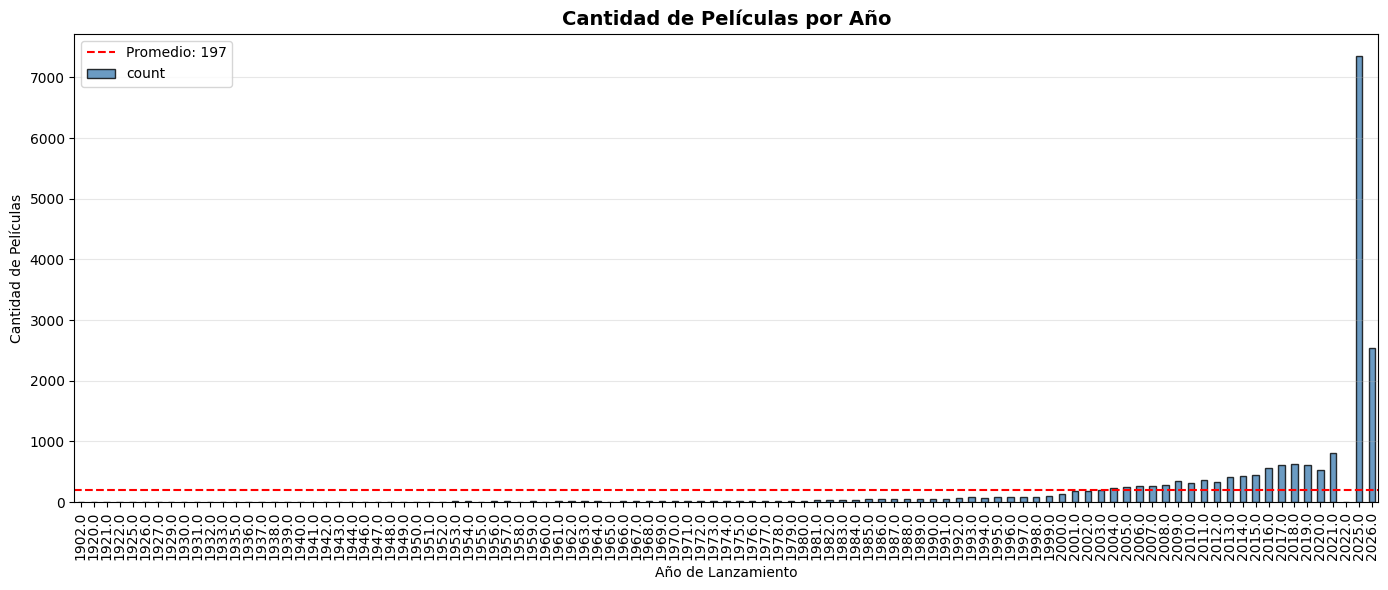


Top 5 años con más películas:


,Cantidad de Películas
releaseYear,
2025.0,7351
2026.0,2537
2021.0,814
2018.0,628
2017.0,617


In [39]:
# Películas por año
peliculas_por_anio = df['releaseYear'].value_counts().sort_index()

# Año con más películas
anio_max = peliculas_por_anio.idxmax()
cantidad_max = peliculas_por_anio.max()

print(f"=== PELÍCULAS POR AÑO ===")
print(f"\nAño con más películas: {anio_max} ({cantidad_max} películas)")
print(f"Total de años en el dataset: {len(peliculas_por_anio)}")
print(f"Promedio de películas por año: {peliculas_por_anio.mean():.2f}")

# Gráfico de barras
plt.figure(figsize=(14, 6))
peliculas_por_anio.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Cantidad de Películas por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.axhline(y=peliculas_por_anio.mean(), color='red', linestyle='--', label=f'Promedio: {peliculas_por_anio.mean():.0f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5 años con más películas
print("\nTop 5 años con más películas:")
display(peliculas_por_anio.nlargest(5).to_frame('Cantidad de Películas'))

### 4.6 Análisis de Géneros Principales

=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===


,Cantidad
genero_principal,
Drama,6
Comedy,4
Animation,3
Thriller,3
Action,1
Romance,1
War,1



=== GÉNERO PRINCIPAL PREDOMINANTE EN EL DATASET ===
Género más frecuente: Drama (3734 películas)


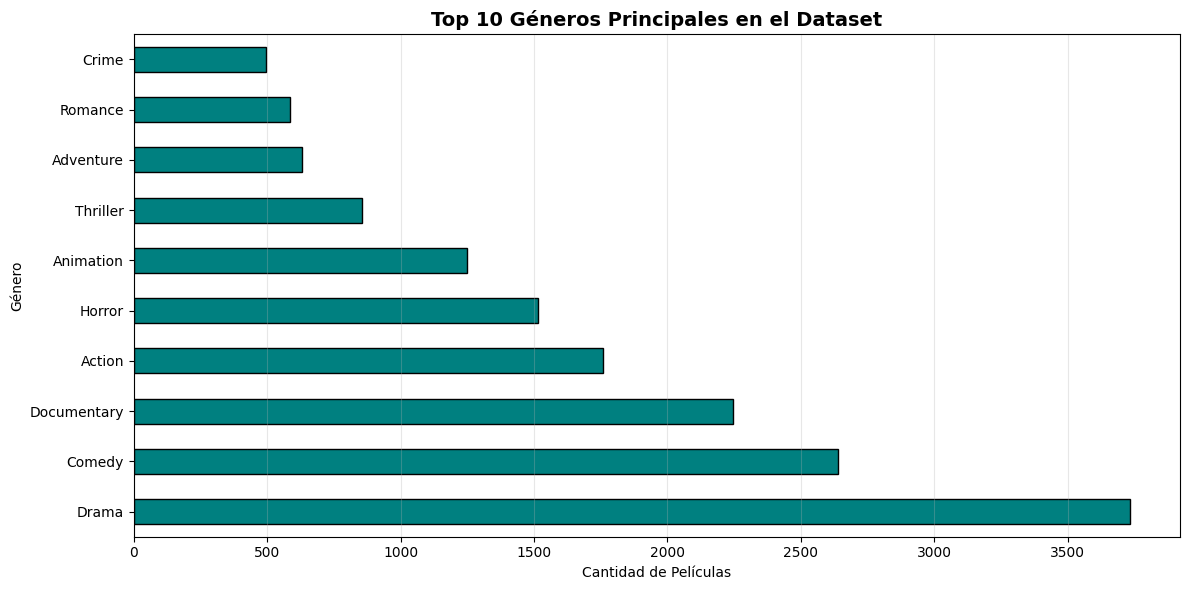


=== GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS ===
Género predominante: Documentary


,Cantidad
genero_principal,
Documentary,4
Drama,4
Action,3
Music,2
Horror,1
Animation,1



Duración promedio por género (top 5):


,Duración Promedio (min)
genero_principal,
War,104.618557
Action,99.459659
Adventure,99.141494
Crime,95.911469
History,92.303030


In [40]:
# Asegurar que existe la columna genero_principal
if 'genero_principal' not in df.columns:
    df['genero_principal'] = df['genres'].str.split('|').str[0]

# 1. Género de las 20 películas más recientes
peliculas_recientes = df.nlargest(20, 'releaseYear')[['title', 'releaseYear', 'genero_principal']]
generos_recientes = peliculas_recientes['genero_principal'].value_counts()

print("=== GÉNERO DE LAS 20 PELÍCULAS MÁS RECIENTES ===")
display(generos_recientes.to_frame('Cantidad'))

# 2. Género principal que predomina en todo el dataset
genero_predominante = df['genero_principal'].value_counts()

print("\n=== GÉNERO PRINCIPAL PREDOMINANTE EN EL DATASET ===")
print(f"Género más frecuente: {genero_predominante.index[0]} ({genero_predominante.values[0]} películas)")

# Gráfico del top 10 géneros
plt.figure(figsize=(12, 6))
genero_predominante.head(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Géneros Principales en el Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Género de las películas más largas
peliculas_largas = df.nlargest(20, 'runtime')[['title', 'runtime', 'genero_principal', 'releaseYear']]
generos_largas = peliculas_largas['genero_principal'].value_counts()

print("\n=== GÉNERO DE LAS 20 PELÍCULAS MÁS LARGAS ===")
print(f"Género predominante: {generos_largas.index[0]}")
display(generos_largas.to_frame('Cantidad'))
print(f"\nDuración promedio por género (top 5):")
duracion_promedio = df.groupby('genero_principal')['runtime'].mean().sort_values(ascending=False).head(5)
display(duracion_promedio.to_frame('Duración Promedio (min)'))

### 4.7 ¿Las películas de qué género principal obtuvieron mayores ganancias?

=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===

Género con mayores ganancias: Action
Ganancias totales: $92,263,113,921

Top 10 Géneros por Ganancias Totales:


,Ganancias (Millones USD)
genero_principal,
Action,92263.113921
Adventure,59846.616553
Comedy,49741.455689
Drama,44378.391333
Animation,33917.558348
Family,18573.850847
Horror,17605.724742
Science Fiction,17365.632247
Fantasy,14965.596592



=== GANANCIAS PROMEDIO POR PELÍCULA SEGÚN GÉNERO ===

Género con mayor ganancia promedio: Adventure
Ganancia promedio: $95,145,654


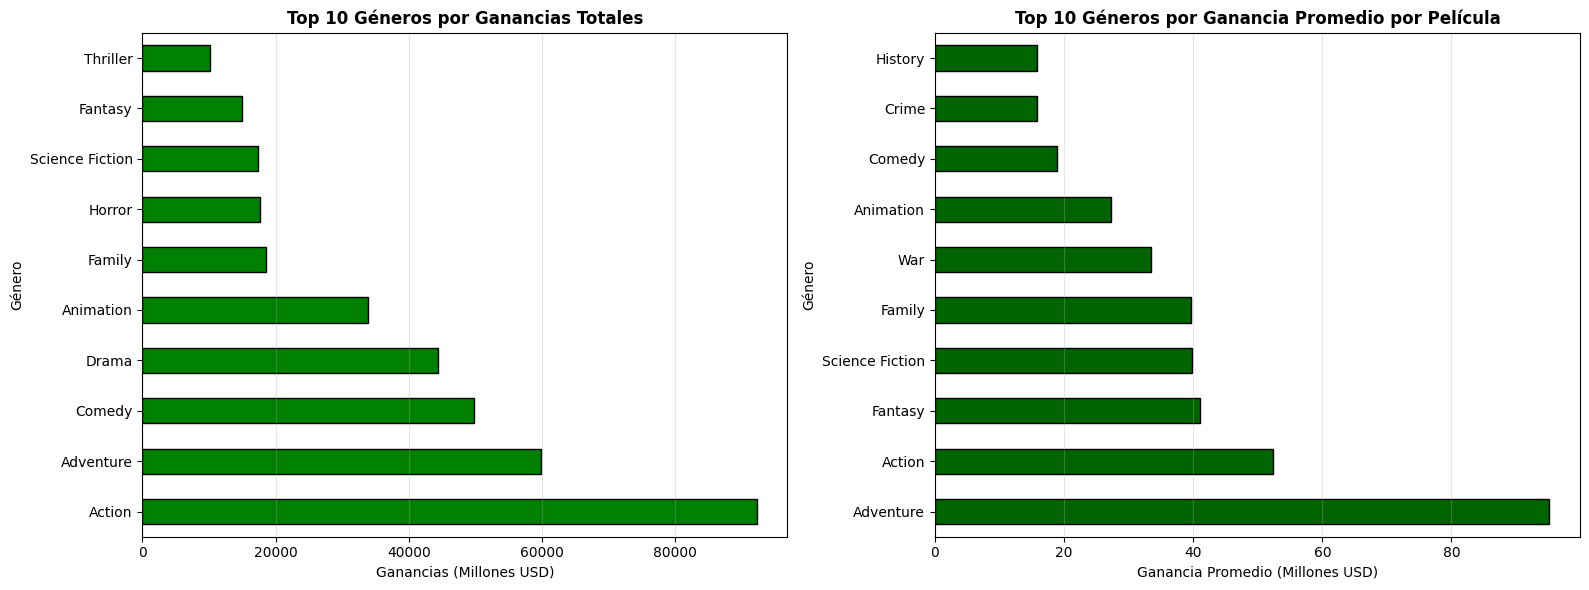

In [41]:
# Calcular ganancias (revenue - budget)
df['ganancias'] = df['revenue'] - df['budget']

# Ganancias totales por género
ganancias_por_genero = df.groupby('genero_principal')['ganancias'].sum().sort_values(ascending=False)

print("=== GANANCIAS TOTALES POR GÉNERO PRINCIPAL ===")
print(f"\nGénero con mayores ganancias: {ganancias_por_genero.index[0]}")
print(f"Ganancias totales: ${ganancias_por_genero.values[0]:,.0f}")

# Top 10 géneros por ganancias totales
print("\nTop 10 Géneros por Ganancias Totales:")
top_10_ganancias = ganancias_por_genero.head(10) / 1_000_000  # En millones
display(top_10_ganancias.to_frame('Ganancias (Millones USD)'))

# Ganancias promedio por película de cada género
ganancias_promedio_genero = df.groupby('genero_principal')['ganancias'].mean().sort_values(ascending=False)

print("\n=== GANANCIAS PROMEDIO POR PELÍCULA SEGÚN GÉNERO ===")
print(f"\nGénero con mayor ganancia promedio: {ganancias_promedio_genero.index[0]}")
print(f"Ganancia promedio: ${ganancias_promedio_genero.values[0]:,.0f}")

# Gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ganancias totales
top_10_ganancias.plot(kind='barh', ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Top 10 Géneros por Ganancias Totales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ganancias (Millones USD)')
axes[0].set_ylabel('Género')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico 2: Ganancias promedio
(ganancias_promedio_genero.head(10) / 1_000_000).plot(kind='barh', ax=axes[1], color='darkgreen', edgecolor='black')
axes[1].set_title('Top 10 Géneros por Ganancia Promedio por Película', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Ganancia Promedio (Millones USD)')
axes[1].set_ylabel('Género')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 4.8 ¿La cantidad de actores influye en los ingresos? ¿Se han hecho películas con más actores en los últimos años?

=== INFLUENCIA DE LA CANTIDAD DE ACTORES EN LOS INGRESOS ===

Coeficiente de correlación: -0.0084
Interpretación: Correlación débil

=== EVOLUCIÓN DE LA CANTIDAD PROMEDIO DE ACTORES ===
Promedio de actores en años recientes (últimos 10 años): 2118.73
Promedio de actores en años antiguos (primeros 10 años): 24.25


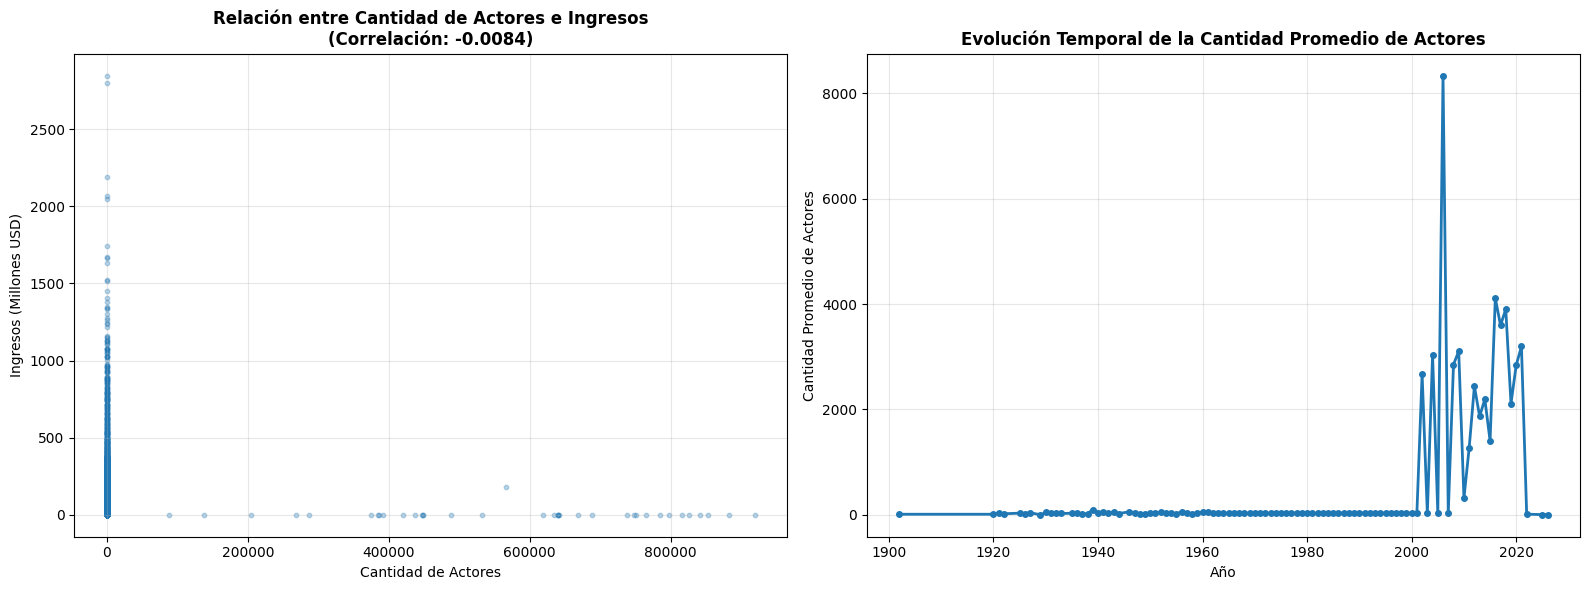

In [42]:
# 1. Correlación entre cantidad de actores e ingresos
correlacion_actores_ingresos = df['actorsAmount'].corr(df['revenue'])

print("=== INFLUENCIA DE LA CANTIDAD DE ACTORES EN LOS INGRESOS ===")
print(f"\nCoeficiente de correlación: {correlacion_actores_ingresos:.4f}")

if abs(correlacion_actores_ingresos) < 0.3:
    interpretacion = "débil"
elif abs(correlacion_actores_ingresos) < 0.7:
    interpretacion = "moderada"
else:
    interpretacion = "fuerte"

print(f"Interpretación: Correlación {interpretacion}")

# 2. Evolución de la cantidad de actores por año
actores_por_anio = df.groupby('releaseYear')['actorsAmount'].mean().sort_index()

print("\n=== EVOLUCIÓN DE LA CANTIDAD PROMEDIO DE ACTORES ===")
print(f"Promedio de actores en años recientes (últimos 10 años): {actores_por_anio.tail(10).mean():.2f}")
print(f"Promedio de actores en años antiguos (primeros 10 años): {actores_por_anio.head(10).mean():.2f}")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter plot de actores vs ingresos
axes[0].scatter(df['actorsAmount'], df['revenue']/1_000_000, alpha=0.3, s=10)
axes[0].set_xlabel('Cantidad de Actores')
axes[0].set_ylabel('Ingresos (Millones USD)')
axes[0].set_title(f'Relación entre Cantidad de Actores e Ingresos\n(Correlación: {correlacion_actores_ingresos:.4f})', 
                  fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Evolución temporal de cantidad de actores
axes[1].plot(actores_por_anio.index, actores_por_anio.values, marker='o', linewidth=2, markersize=4)
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Cantidad Promedio de Actores')
axes[1].set_title('Evolución Temporal de la Cantidad Promedio de Actores', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.9 ¿La cantidad de hombres y mujeres en el reparto influye en la popularidad e ingresos?

=== CORRELACIONES: COMPOSICIÓN DEL REPARTO VS ÉXITO ===

Mujeres vs Ingresos: -0.0170
Hombres vs Ingresos: -0.0273
Mujeres vs Popularidad: 0.0101
Hombres vs Popularidad: 0.0215

=== ANÁLISIS POR BALANCE DE GÉNERO EN EL REPARTO ===


,cantidad_peliculas,revenue_millones,popularity
balance_genero,,,
Inclinación Masculina,3725,55.53,50.500261
Balanceado,1876,29.15,37.621260
Inclinación Femenina,1288,23.59,35.735366
Predominio Masculino,11887,23.32,17.089571
Predominio Femenino,1106,3.00,12.682459


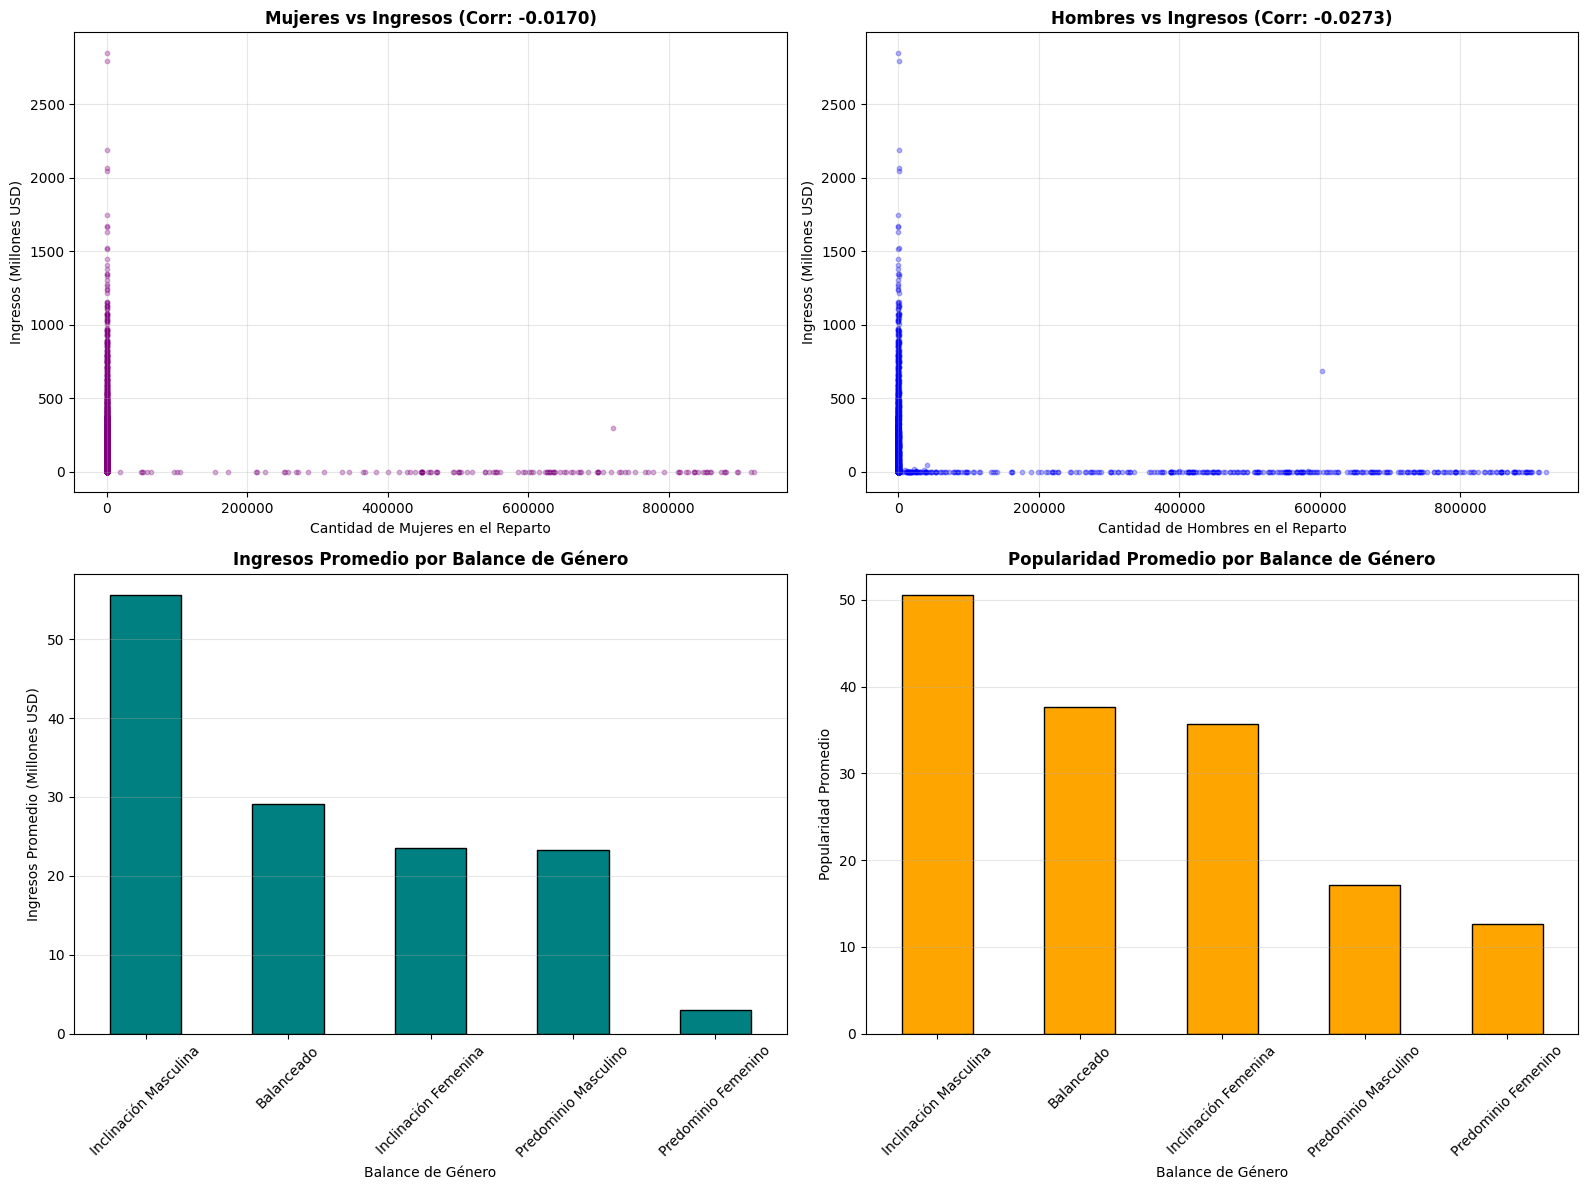

In [43]:
# Calcular correlaciones
correlaciones = {
    'Mujeres vs Ingresos': df['castWomenAmount'].corr(df['revenue']),
    'Hombres vs Ingresos': df['castMenAmount'].corr(df['revenue']),
    'Mujeres vs Popularidad': df['castWomenAmount'].corr(df['popularity']),
    'Hombres vs Popularidad': df['castMenAmount'].corr(df['popularity'])
}

print("=== CORRELACIONES: COMPOSICIÓN DEL REPARTO VS ÉXITO ===\n")
for clave, valor in correlaciones.items():
    print(f"{clave}: {valor:.4f}")

# Calcular ratio de género
df['ratio_genero'] = df['castWomenAmount'] / (df['castWomenAmount'] + df['castMenAmount'])
df['ratio_genero'] = df['ratio_genero'].fillna(0)

# Categorizar películas por balance de género
def categorizar_balance(ratio):
    if ratio < 0.3:
        return 'Predominio Masculino'
    elif ratio < 0.45:
        return 'Inclinación Masculina'
    elif ratio < 0.55:
        return 'Balanceado'
    elif ratio < 0.7:
        return 'Inclinación Femenina'
    else:
        return 'Predominio Femenino'

df['balance_genero'] = df['ratio_genero'].apply(categorizar_balance)

# Análisis por categoría de balance
analisis_balance = df.groupby('balance_genero').agg({
    'revenue': 'mean',
    'popularity': 'mean',
    'title': 'count'
}).rename(columns={'title': 'cantidad_peliculas'})

analisis_balance['revenue_millones'] = (analisis_balance['revenue'] / 1_000_000).round(2)

print("\n=== ANÁLISIS POR BALANCE DE GÉNERO EN EL REPARTO ===")
display(analisis_balance[['cantidad_peliculas', 'revenue_millones', 'popularity']].sort_values('revenue_millones', ascending=False))

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Mujeres vs Ingresos
axes[0, 0].scatter(df['castWomenAmount'], df['revenue']/1_000_000, alpha=0.3, s=10, color='purple')
axes[0, 0].set_xlabel('Cantidad de Mujeres en el Reparto')
axes[0, 0].set_ylabel('Ingresos (Millones USD)')
axes[0, 0].set_title(f'Mujeres vs Ingresos (Corr: {correlaciones["Mujeres vs Ingresos"]:.4f})', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Hombres vs Ingresos
axes[0, 1].scatter(df['castMenAmount'], df['revenue']/1_000_000, alpha=0.3, s=10, color='blue')
axes[0, 1].set_xlabel('Cantidad de Hombres en el Reparto')
axes[0, 1].set_ylabel('Ingresos (Millones USD)')
axes[0, 1].set_title(f'Hombres vs Ingresos (Corr: {correlaciones["Hombres vs Ingresos"]:.4f})', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Balance de género vs Ingresos promedio
orden = analisis_balance.sort_values('revenue_millones', ascending=False).index
analisis_balance.loc[orden, 'revenue_millones'].plot(kind='bar', ax=axes[1, 0], color='teal', edgecolor='black')
axes[1, 0].set_xlabel('Balance de Género')
axes[1, 0].set_ylabel('Ingresos Promedio (Millones USD)')
axes[1, 0].set_title('Ingresos Promedio por Balance de Género', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Gráfico 4: Balance de género vs Popularidad promedio
analisis_balance.loc[orden, 'popularity'].plot(kind='bar', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Balance de Género')
axes[1, 1].set_ylabel('Popularidad Promedio')
axes[1, 1].set_title('Popularidad Promedio por Balance de Género', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4.10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

Top 20 películas mejor calificadas:
                                title                                       director  voteAvg  voteCount
                       Crocodile Dose                                   Jason Waters     10.0          1
                         The Exchange                               Fischer Sawatzky     10.0          1
                       What is This ?                                     Kanan Gill     10.0          1
                     Silver Gold Wood                                Vitorio Stankov     10.0          1
                    AdiÃ³s Para Nunca                               Daniela Vidovich     10.0          1
                          GO TO SLEEP                                 Tirion Liddell     10.0          1
                Le Moment sera le Bon                         Guillaume Huss Seewald     10.0          1
                              Satiata                                  Cyprien Klein     10.0          1
                   

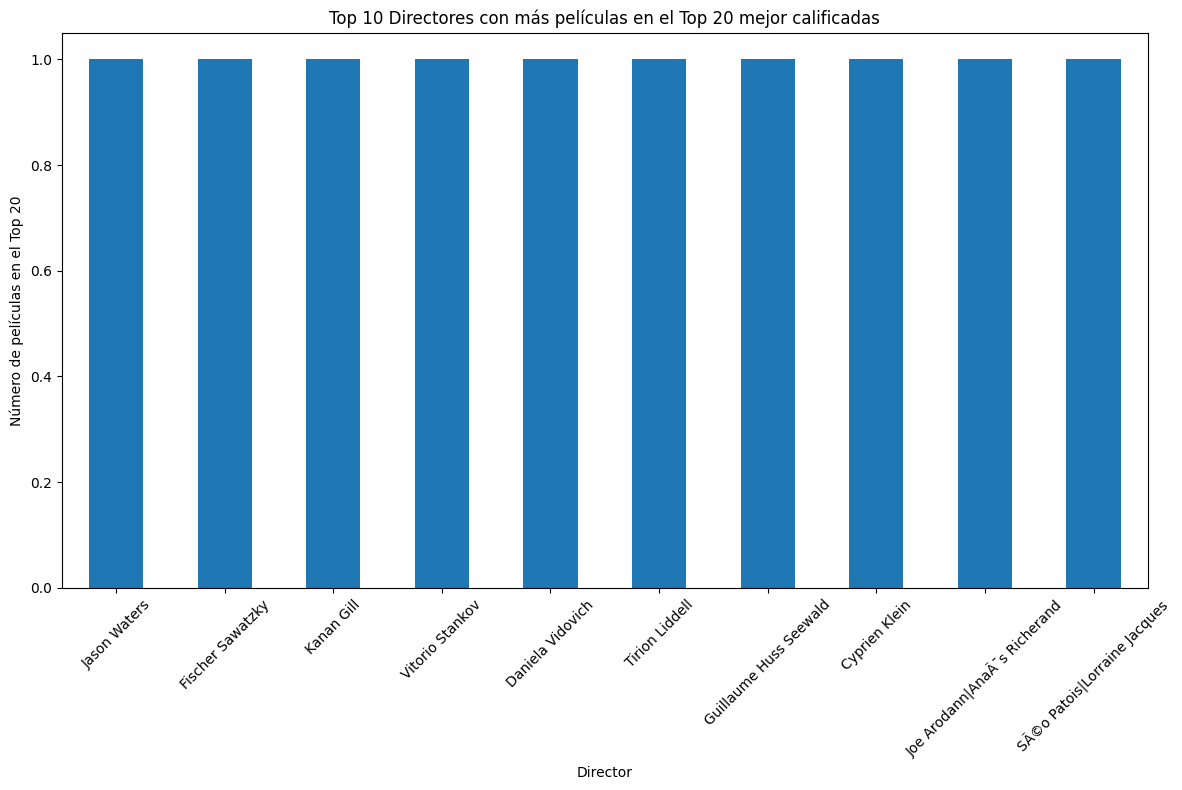

In [44]:
# 4.10. Directores de las 20 películas mejor calificadas
# Obtener las 20 películas mejor calificadas (por voteAvg)
top_20_movies = df.nlargest(20, 'voteAvg')
print("Top 20 películas mejor calificadas:")
print(top_20_movies[['title', 'director', 'voteAvg', 'voteCount']].to_string(index=False))

print("\nDirectores de las 20 películas mejor calificadas:")
directors_top_20 = top_20_movies['director'].value_counts()
print(directors_top_20)

# Visualización de los directores más frecuentes en el top 20
plt.figure(figsize=(12, 8))
if len(directors_top_20) > 10:
    directors_top_20.head(10).plot(kind='bar')
    plt.title('Top 10 Directores con más películas en el Top 20 mejor calificadas')
else:
    directors_top_20.plot(kind='bar')
    plt.title('Directores de las 20 películas mejor calificadas')
plt.xlabel('Director')
plt.ylabel('Número de películas en el Top 20')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos?

Correlación entre presupuesto e ingresos: 0.7229

Estadísticas de películas con presupuesto e ingresos > 0:
Número de películas: 4502
Presupuesto promedio: $39,251,389.94
Ingresos promedio: $123,980,107.69


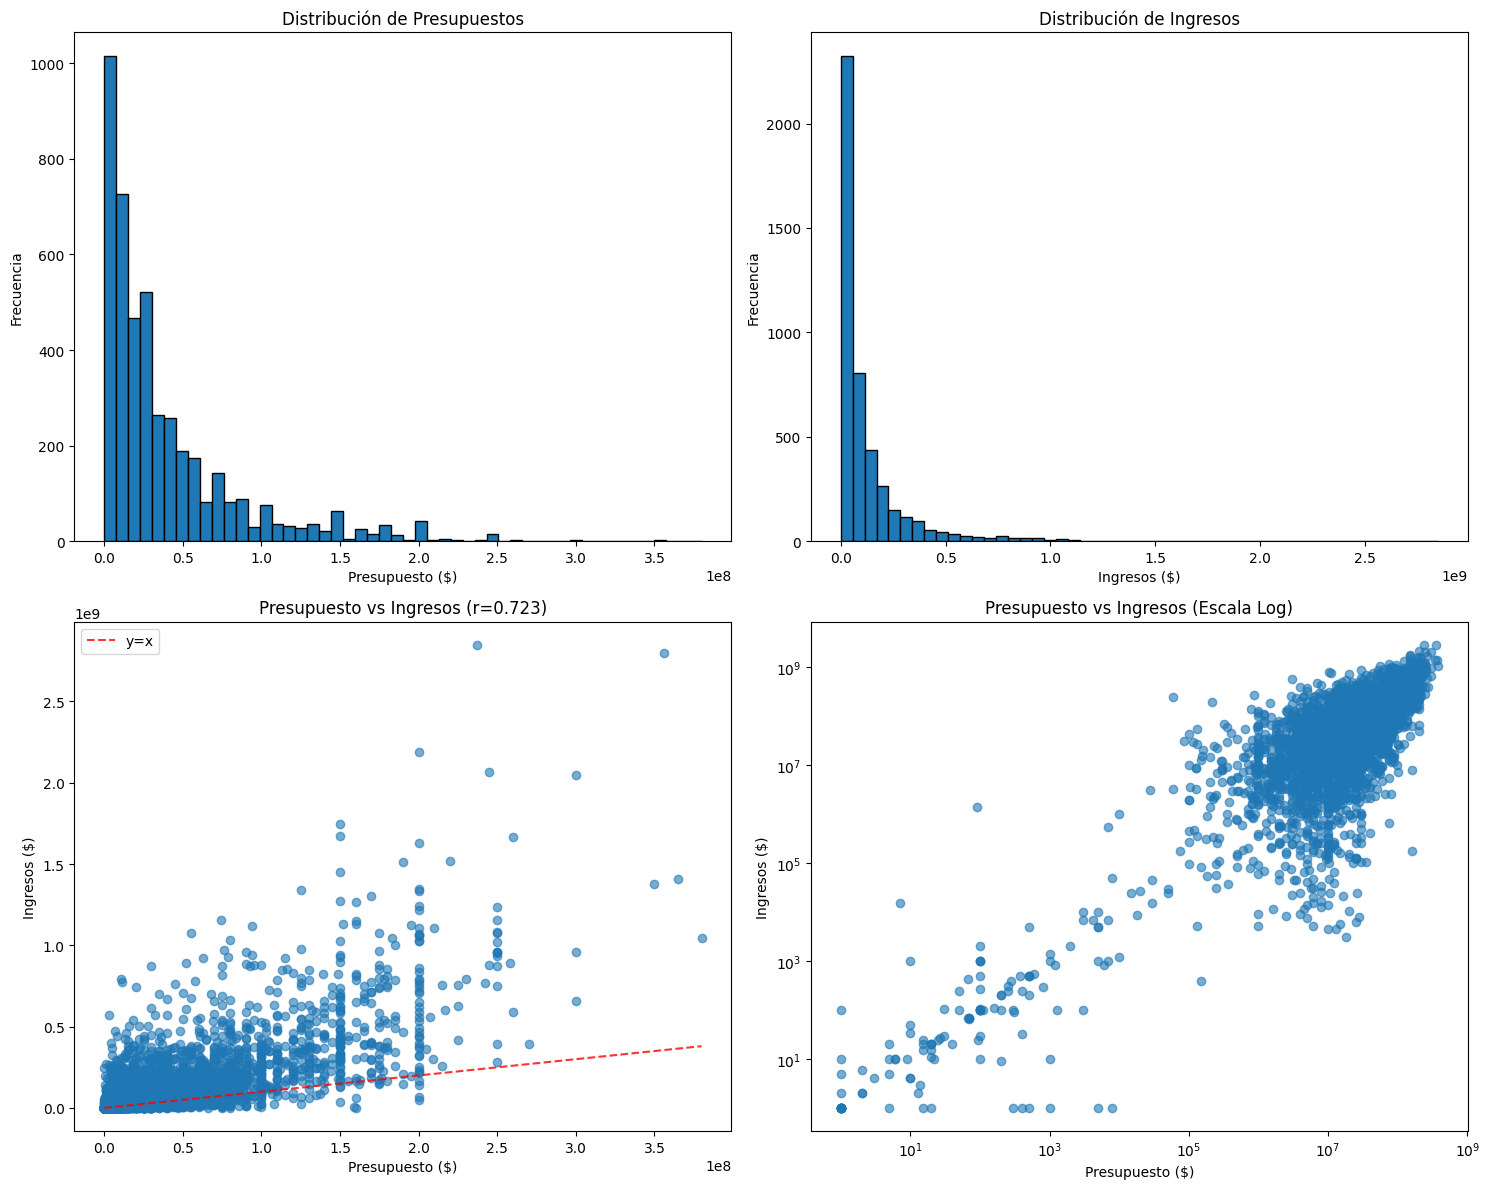


ROI promedio: 9.38
ROI mediana: 1.37

Top 10 películas con mejor ROI:
                       title   budget     revenue          roi
   The Notorious Bettie Page     90.0   1410778.0 15674.311111
     The Blair Witch Project  60000.0 248639099.0  4142.984983
       The Sugar creek beast      7.0     15000.0  2141.857143
         Paranormal Activity 215000.0 194183034.0   902.176902
                 The Gallows 100000.0  42664410.0   425.644100
                  Open Water 130000.0  54667954.0   419.522723
The Texas Chain Saw Massacre  85000.0  30859000.0   362.047059
                       Bambi 858000.0 267447150.0   310.709965
    Night of the Living Dead 114000.0  30000000.0   262.157895
                   Halloween 325000.0  70274000.0   215.227692


In [45]:
# 4.11. Correlación entre presupuestos e ingresos
# Filtrar películas con presupuesto e ingresos > 0 para el análisis
movies_with_budget_revenue = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Calcular correlación
correlation = movies_with_budget_revenue['budget'].corr(movies_with_budget_revenue['revenue'])
print(f"Correlación entre presupuesto e ingresos: {correlation:.4f}")

# Estadísticas básicas
print("\nEstadísticas de películas con presupuesto e ingresos > 0:")
print(f"Número de películas: {len(movies_with_budget_revenue)}")
print(f"Presupuesto promedio: ${movies_with_budget_revenue['budget'].mean():,.2f}")
print(f"Ingresos promedio: ${movies_with_budget_revenue['revenue'].mean():,.2f}")

# Crear subplots para mostrar múltiples gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de presupuestos
axes[0, 0].hist(movies_with_budget_revenue['budget'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribución de Presupuestos')
axes[0, 0].set_xlabel('Presupuesto ($)')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma de ingresos
axes[0, 1].hist(movies_with_budget_revenue['revenue'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribución de Ingresos')
axes[0, 1].set_xlabel('Ingresos ($)')
axes[0, 1].set_ylabel('Frecuencia')

# Diagrama de dispersión
axes[1, 0].scatter(movies_with_budget_revenue['budget'], movies_with_budget_revenue['revenue'], alpha=0.6)
axes[1, 0].set_title(f'Presupuesto vs Ingresos (r={correlation:.3f})')
axes[1, 0].set_xlabel('Presupuesto ($)')
axes[1, 0].set_ylabel('Ingresos ($)')
axes[1, 0].plot([movies_with_budget_revenue['budget'].min(), movies_with_budget_revenue['budget'].max()], 
                [movies_with_budget_revenue['budget'].min(), movies_with_budget_revenue['budget'].max()], 
                'r--', alpha=0.8, label='y=x')
axes[1, 0].legend()

# Diagrama de dispersión con escala logarítmica para mejor visualización
axes[1, 1].scatter(movies_with_budget_revenue['budget'], movies_with_budget_revenue['revenue'], alpha=0.6)
axes[1, 1].set_title('Presupuesto vs Ingresos (Escala Log)')
axes[1, 1].set_xlabel('Presupuesto ($)')
axes[1, 1].set_ylabel('Ingresos ($)')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

# ROI (Return on Investment)
movies_with_budget_revenue['roi'] = (movies_with_budget_revenue['revenue'] - movies_with_budget_revenue['budget']) / movies_with_budget_revenue['budget']
print(f"\nROI promedio: {movies_with_budget_revenue['roi'].mean():.2f}")
print(f"ROI mediana: {movies_with_budget_revenue['roi'].median():.2f}")

# Top 10 películas con mejor ROI
print("\nTop 10 películas con mejor ROI:")
top_roi = movies_with_budget_revenue.nlargest(10, 'roi')
print(top_roi[['title', 'budget', 'revenue', 'roi']].to_string(index=False))

## 4.12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

Ingresos por mes de lanzamiento:


,Ingresos_Promedio,Ingresos_Mediana,Num_Peliculas
releaseMonth,,,
1,6.040760e+07,27233270.0,368
2,8.276857e+07,41146058.0,366
3,9.710837e+07,37713879.0,429
4,1.022529e+08,32339075.0,358
5,1.652726e+08,45361000.0,371
6,1.658074e+08,66001002.0,468
7,1.327641e+08,54682547.0,465
8,7.077733e+07,34032921.5,464
9,6.033503e+07,20350754.0,571


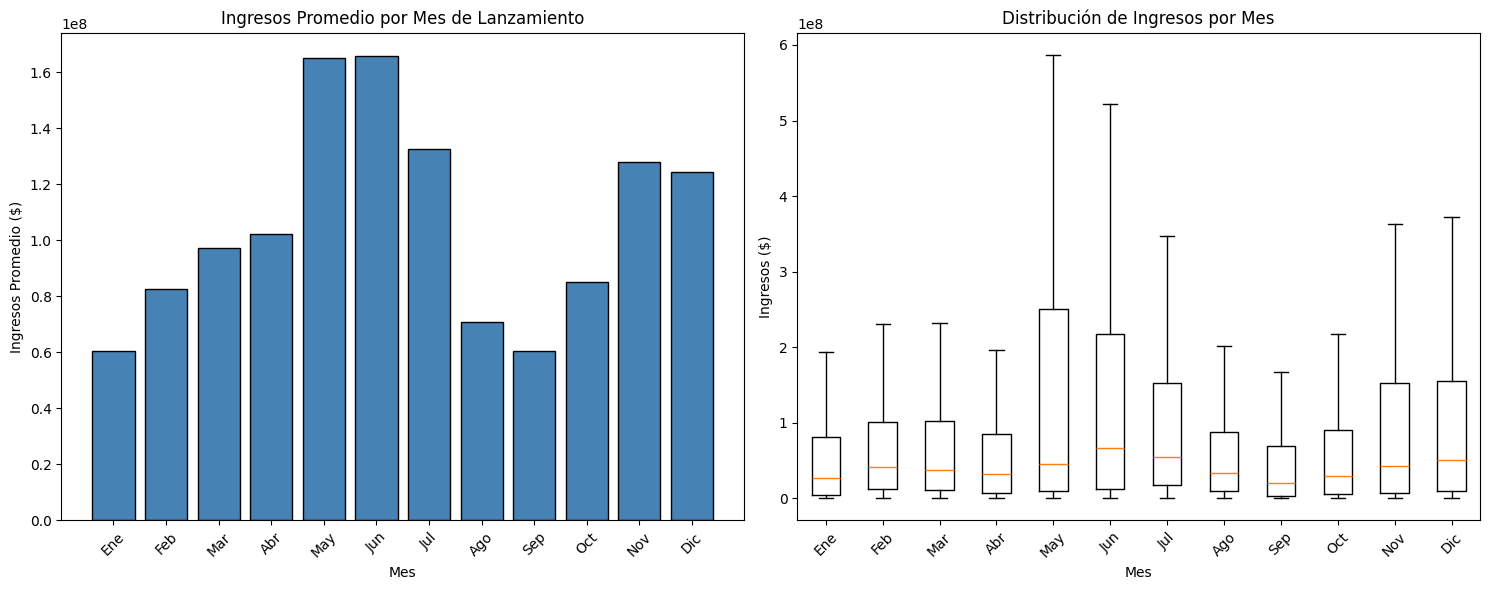


Top 5 meses con mejores ingresos promedio:
1. Jun: $165,807,439.40
2. May: $165,272,556.65
3. Jul: $132,764,089.19
4. Nov: $127,811,629.86
5. Dic: $124,411,467.62


In [46]:
# 4.12. Meses de lanzamiento y ingresos 
# Convertir releaseDate a datetime y extraer el mes
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseMonth'] = df['releaseDate'].dt.month

# Filtrar películas con ingresos > 0
movies_with_revenue = df[df['revenue'] > 0].copy()

# Calcular ingresos promedio por mes (solo meses con datos)
monthly_revenue = movies_with_revenue.groupby('releaseMonth')['revenue'].agg(['mean', 'median', 'count']).round(2)
monthly_revenue.columns = ['Ingresos_Promedio', 'Ingresos_Mediana', 'Num_Peliculas']

# Reindexar para asegurar meses 1..12 (llenar con 0 donde no hay datos)
month_idx = list(range(1, 13))
monthly_revenue = monthly_revenue.reindex(month_idx, fill_value=0)

print("Ingresos por mes de lanzamiento:")
display(monthly_revenue)

# Nombres de los meses
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras - Ingresos promedio por mes
axes[0].bar(month_idx, monthly_revenue['Ingresos_Promedio'], color='steelblue', edgecolor='black')
axes[0].set_title('Ingresos Promedio por Mes de Lanzamiento')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Ingresos Promedio ($)')
axes[0].set_xticks(month_idx)
axes[0].set_xticklabels(month_names)
axes[0].tick_params(axis='x', rotation=45)

# Diagrama de caja y bigotes - Distribución de ingresos por mes
months_data = []
for m in month_idx:
    month_data = movies_with_revenue[movies_with_revenue['releaseMonth'] == m]['revenue']
    if len(month_data) > 0:
        months_data.append(month_data)
    else:
        # usar lista con un 0 para mantener la posición, pero no afectará mucho la visualización
        months_data.append([0])

axes[1].boxplot(months_data, labels=month_names, showfliers=False)
axes[1].set_title('Distribución de Ingresos por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Ingresos ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Top meses con datos (ignorar meses sin películas)
valid_months = monthly_revenue[monthly_revenue['Num_Peliculas'] > 0]
print("\nTop 5 meses con mejores ingresos promedio:")
top_months = valid_months.nlargest(5, 'Ingresos_Promedio')
for idx, (month, data) in enumerate(top_months.iterrows()):
    print(f"{idx+1}. {month_names[int(month)-1]}: ${data['Ingresos_Promedio']:,.2f}")

## 4.13. ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

Promedio de ingresos de las top 10 películas por mes:
Ene: $439,221,421.40
Feb: $724,399,932.90
Mar: $818,497,010.50
Abr: $1,472,048,604.20
May: $923,216,724.90
Jun: $1,190,634,807.00
Jul: $1,081,884,945.10
Ago: $535,092,329.20
Sep: $616,810,857.80
Oct: $875,843,401.60
Nov: $1,210,266,022.00
Dic: $1,442,830,739.50

Promedio de películas lanzadas por mes:
Ene: 54.7 películas
Feb: 11.9 películas
Mar: 13.8 películas
Abr: 10.5 películas
May: 11.5 películas
Jun: 11.2 películas
Jul: 12.5 películas
Ago: 14.1 películas
Sep: 18.3 películas
Oct: 15.2 películas
Nov: 73.9 películas
Dic: 55.2 películas


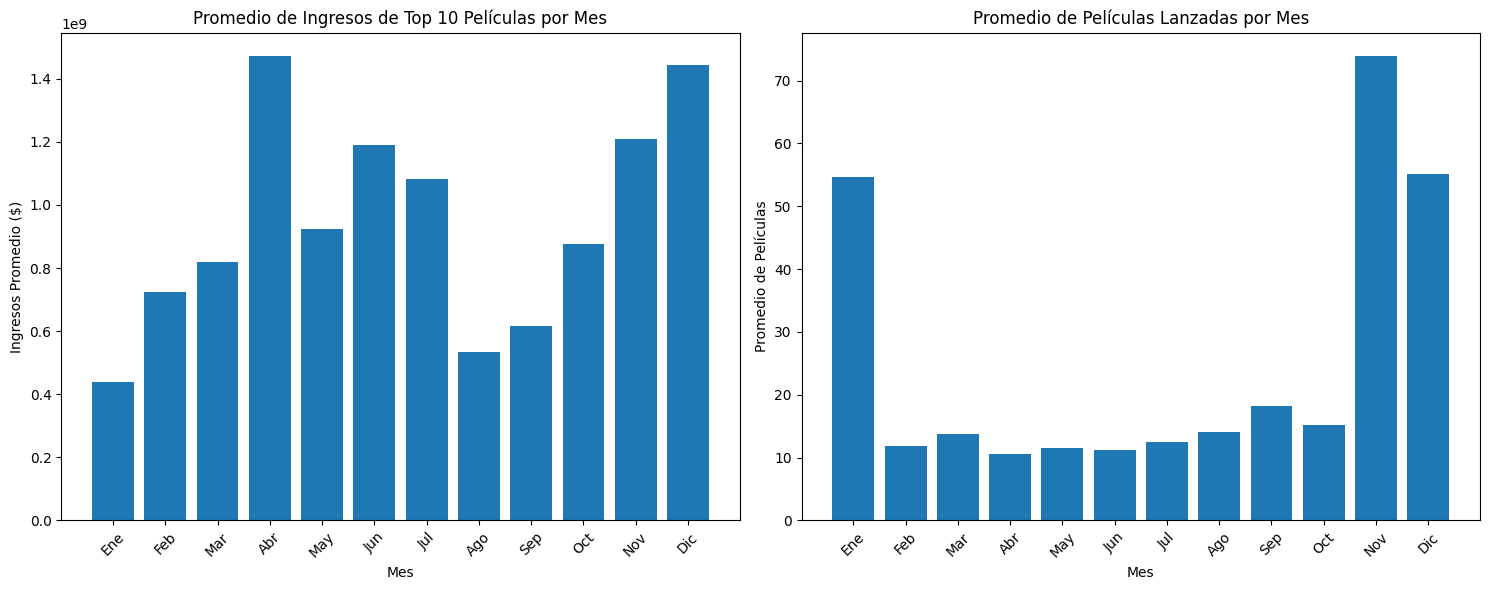


Total promedio general de películas por mes: 25.2
Mes con más películas en promedio: Nov (73.9 películas)
Mes con mejores ingresos promedio (top 10): Abr ($1,472,048,604.20)


In [47]:
# 4.13. Mejores meses de lanzamiento y promedio de películas por mes
# Análisis de las películas con mejores ingresos por mes
top_movies_by_month = movies_with_revenue.groupby('releaseMonth').apply(
    lambda x: x.nlargest(10, 'revenue')['revenue'].mean()
).round(2)

print("Promedio de ingresos de las top 10 películas por mes:")
for month in range(1, 13):
    if month in top_movies_by_month.index:
        print(f"{month_names[month-1]}: ${top_movies_by_month[month]:,.2f}")
    else:
        print(f"{month_names[month-1]}: Sin datos suficientes")

# Contar películas por mes por año para obtener promedio
movies_by_month_year = df.groupby(['releaseYear', 'releaseMonth']).size().reset_index(name='count')
avg_movies_per_month = movies_by_month_year.groupby('releaseMonth')['count'].mean().round(2)

print(f"\nPromedio de películas lanzadas por mes:")
for month in range(1, 13):
    if month in avg_movies_per_month.index:
        print(f"{month_names[month-1]}: {avg_movies_per_month[month]:.1f} películas")
    else:
        print(f"{month_names[month-1]}: 0.0 películas")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras: Mejores ingresos por mes (top 10 promedio)
axes[0].bar(range(1, 13), [top_movies_by_month.get(i, 0) for i in range(1, 13)])
axes[0].set_title('Promedio de Ingresos de Top 10 Películas por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Ingresos Promedio ($)')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_names)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras: Promedio de películas por mes
axes[1].bar(range(1, 13), [avg_movies_per_month.get(i, 0) for i in range(1, 13)])
axes[1].set_title('Promedio de Películas Lanzadas por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Promedio de Películas')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Identificar los mejores meses
print(f"\nTotal promedio general de películas por mes: {avg_movies_per_month.mean():.1f}")
print(f"Mes con más películas en promedio: {month_names[int(avg_movies_per_month.idxmax())-1]} ({avg_movies_per_month.max():.1f} películas)")
best_revenue_month = int(top_movies_by_month.idxmax())
print(f"Mes con mejores ingresos promedio (top 10): {month_names[best_revenue_month-1]} (${top_movies_by_month.max():,.2f})")

## 4.14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

Correlaciones entre calificaciones y éxito comercial:
Calificación promedio vs Ingresos: 0.1530
Número de votos vs Ingresos: 0.7282
Calificación promedio vs Popularidad: 0.0775
Número de votos vs Popularidad: 0.1132

Ingresos por categoría de calificación:
                  Ingresos_Promedio  Ingresos_Mediana  Num_Peliculas
rating_category                                                     
Baja (0-5)             3.199262e+07        11817275.0            169
Media (5-6.5)          8.707105e+07        40136146.0           2318
Alta (6.5-8)           1.268966e+08        43469201.0           2600
Excelente (8-10)       1.688715e+08        34934009.0            209


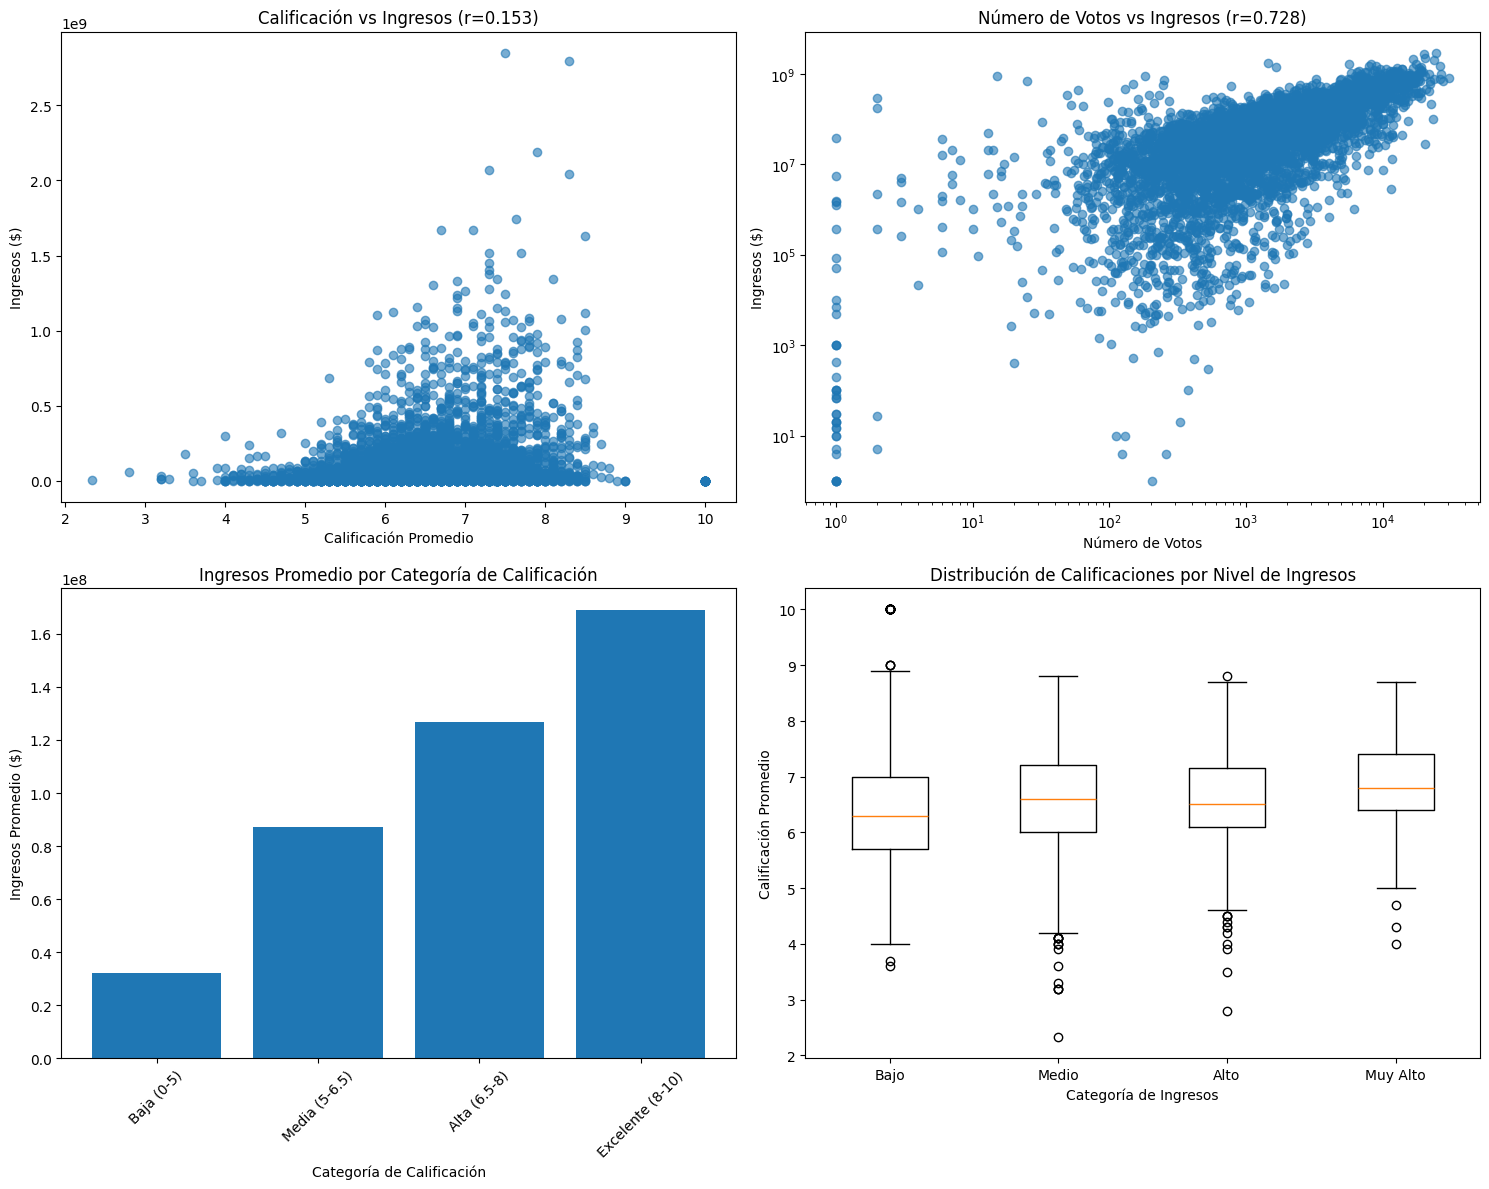


Top 5 películas con mejor calificación y altos ingresos:
                      title  voteAvg  voteCount     revenue
              The Godfather      8.7      15380 245066411.0
Dilwale Dulhania Le Jayenge      8.7       3372 100000000.0
     The Godfather: Part II      8.6       9266 102600000.0
           Schindler's List      8.6      12282 321365567.0
                 Your Name.      8.6       8274 357986087.0


In [48]:
# 4.14. Correlación entre calificaciones y éxito comercial
# Filtrar películas con datos completos
movies_complete = df[(df['revenue'] > 0) & (df['voteAvg'] > 0) & (df['voteCount'] > 0)]

# Calcular correlaciones
corr_rating_revenue = movies_complete['voteAvg'].corr(movies_complete['revenue'])
corr_votes_revenue = movies_complete['voteCount'].corr(movies_complete['revenue'])
corr_rating_popularity = movies_complete['voteAvg'].corr(movies_complete['popularity'])
corr_votes_popularity = movies_complete['voteCount'].corr(movies_complete['popularity'])

print("Correlaciones entre calificaciones y éxito comercial:")
print(f"Calificación promedio vs Ingresos: {corr_rating_revenue:.4f}")
print(f"Número de votos vs Ingresos: {corr_votes_revenue:.4f}")
print(f"Calificación promedio vs Popularidad: {corr_rating_popularity:.4f}")
print(f"Número de votos vs Popularidad: {corr_votes_popularity:.4f}")

# Estadísticas por rangos de calificación
movies_complete['rating_category'] = pd.cut(movies_complete['voteAvg'], 
                                          bins=[0, 5, 6.5, 8, 10], 
                                          labels=['Baja (0-5)', 'Media (5-6.5)', 'Alta (6.5-8)', 'Excelente (8-10)'])

revenue_by_rating = movies_complete.groupby('rating_category')['revenue'].agg(['mean', 'median', 'count'])
revenue_by_rating.columns = ['Ingresos_Promedio', 'Ingresos_Mediana', 'Num_Peliculas']

print("\nIngresos por categoría de calificación:")
print(revenue_by_rating)

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Diagrama de dispersión: Calificación vs Ingresos
axes[0, 0].scatter(movies_complete['voteAvg'], movies_complete['revenue'], alpha=0.6)
axes[0, 0].set_title(f'Calificación vs Ingresos (r={corr_rating_revenue:.3f})')
axes[0, 0].set_xlabel('Calificación Promedio')
axes[0, 0].set_ylabel('Ingresos ($)')

# Diagrama de dispersión: Número de votos vs Ingresos (escala log)
axes[0, 1].scatter(movies_complete['voteCount'], movies_complete['revenue'], alpha=0.6)
axes[0, 1].set_title(f'Número de Votos vs Ingresos (r={corr_votes_revenue:.3f})')
axes[0, 1].set_xlabel('Número de Votos')
axes[0, 1].set_ylabel('Ingresos ($)')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')

# Gráfico de barras: Ingresos promedio por categoría de calificación
revenue_means = revenue_by_rating['Ingresos_Promedio']
axes[1, 0].bar(range(len(revenue_means)), revenue_means)
axes[1, 0].set_title('Ingresos Promedio por Categoría de Calificación')
axes[1, 0].set_xlabel('Categoría de Calificación')
axes[1, 0].set_ylabel('Ingresos Promedio ($)')
axes[1, 0].set_xticks(range(len(revenue_means)))
axes[1, 0].set_xticklabels(revenue_means.index, rotation=45)

# Diagrama de caja: Distribución de calificaciones por categoría de ingresos
movies_complete['revenue_category'] = pd.cut(movies_complete['revenue'], 
                                           bins=[0, 1e6, 50e6, 200e6, float('inf')], 
                                           labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

revenue_categories = movies_complete['revenue_category'].dropna().unique()
rating_data = []
category_labels = []
for cat in ['Bajo', 'Medio', 'Alto', 'Muy Alto']:
    if cat in movies_complete['revenue_category'].values:
        cat_data = movies_complete[movies_complete['revenue_category'] == cat]['voteAvg']
        if len(cat_data) > 0:
            rating_data.append(cat_data)
            category_labels.append(cat)

if rating_data:
    axes[1, 1].boxplot(rating_data, labels=category_labels)
    axes[1, 1].set_title('Distribución de Calificaciones por Nivel de Ingresos')
    axes[1, 1].set_xlabel('Categoría de Ingresos')
    axes[1, 1].set_ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

# Análisis adicional: Top películas por diferentes métricas
print("\nTop 5 películas con mejor calificación y altos ingresos:")
top_rated_revenue = movies_complete[(movies_complete['voteAvg'] >= 7.5) & 
                                   (movies_complete['revenue'] >= 100e6)].nlargest(5, 'voteAvg')
print(top_rated_revenue[['title', 'voteAvg', 'voteCount', 'revenue']].to_string(index=False))

## 4.15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

Impacto de Videos Promocionales:
Con video promocional vs Sin video promocional
Películas con video: 4
Películas sin video: 5394

Estadísticas por presencia de video:
                revenue                   popularity        voteAvg         \
                   mean      median count       mean median    mean median   
has_video                                                                    
0          1.061237e+08  38617779.5  5394       56.5  23.55    6.49    6.6   
1          1.063250e+07   7253949.5     4       17.6  15.76    6.98    7.2   

          voteCount          
               mean  median  
has_video                    
0           2243.18  1088.5  
1            364.50    73.5  

Impacto de Páginas Oficiales:
Con página oficial vs Sin página oficial
Películas con página: 2540
Películas sin página: 2858

Estadísticas por presencia de página oficial:
                   revenue                   popularity        voteAvg         \
                      mean      median

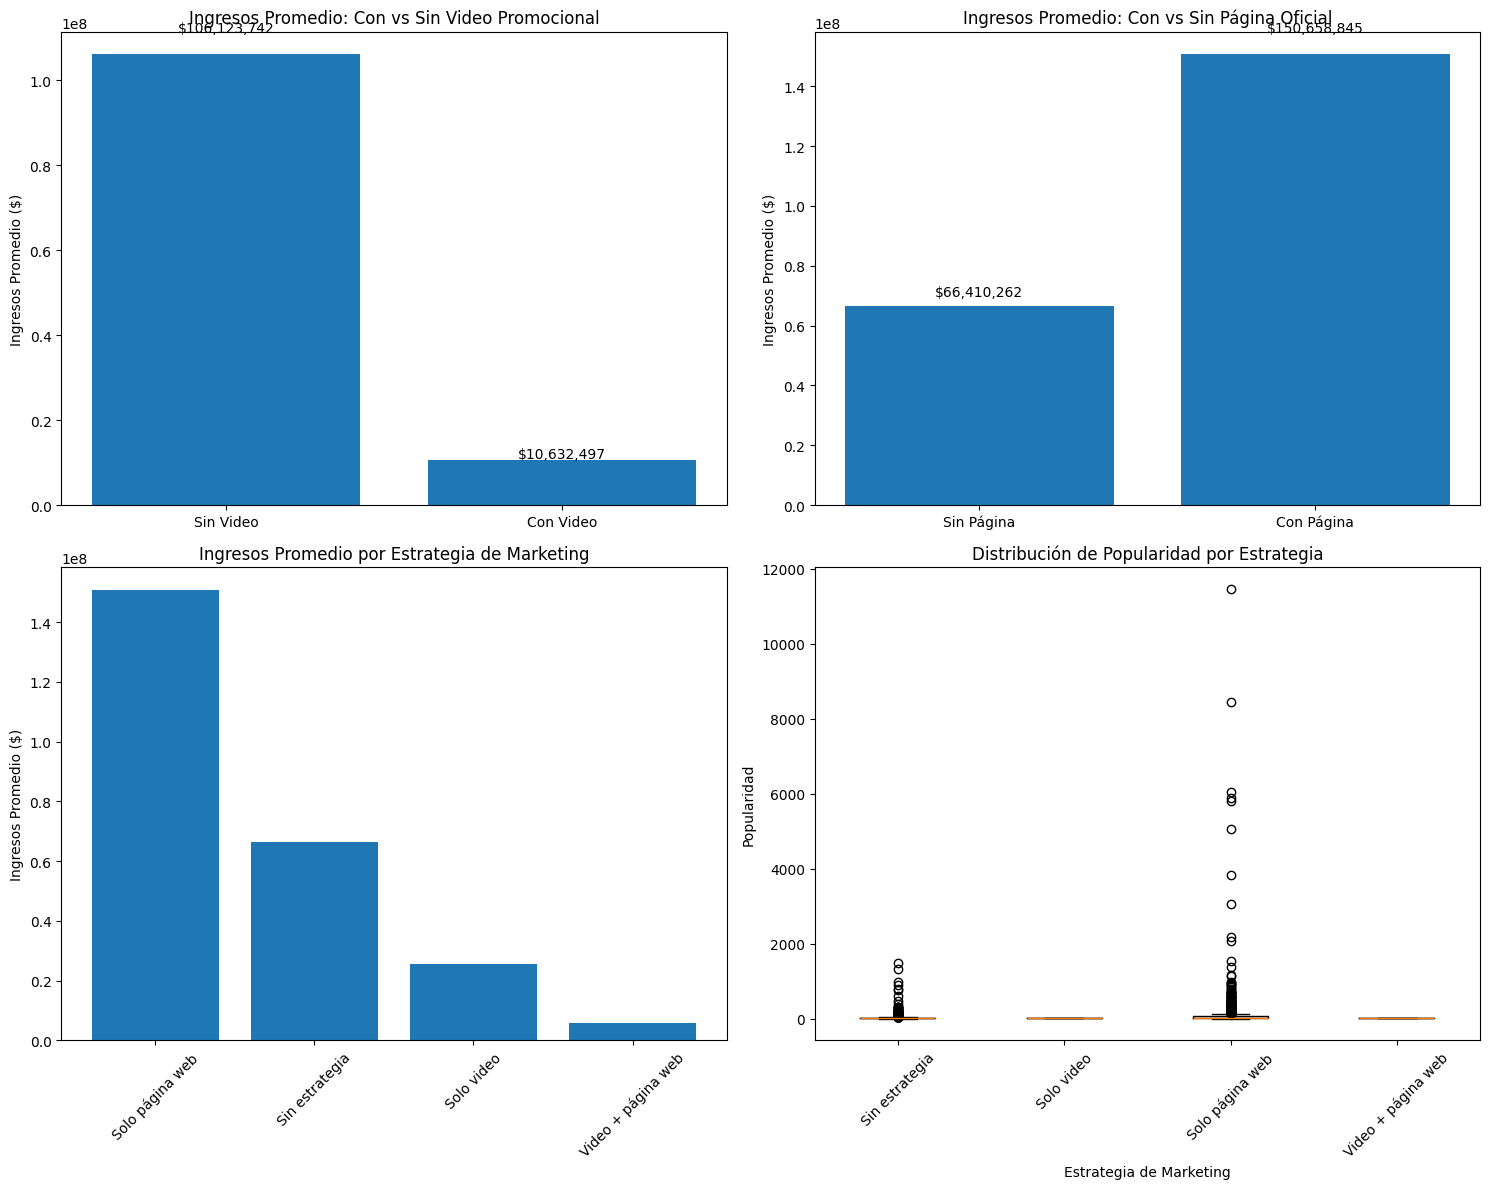


Análisis de Efectividad de Estrategias:
Mejor estrategia: Solo página web ($150,830,255)
Peor estrategia: Video + página web ($5,702,633)
Mejora de la mejor vs peor estrategia: 2544.9%


In [50]:
# 4.15. Estrategias de marketing y resultados
# Crear variables indicadoras para estrategias de marketing
df['has_video'] = df['video'].fillna(0).astype(int)
df['has_homepage'] = (df['homePage'].notna() & (df['homePage'] != '')).astype(int)

# Análisis de películas con ingresos > 0 para comparaciones justas
marketing_analysis = df[df['revenue'] > 0].copy()

# Estadísticas por presencia de videos promocionales
video_stats = marketing_analysis.groupby('has_video').agg({
    'revenue': ['mean', 'median', 'count'],
    'popularity': ['mean', 'median'],
    'voteAvg': ['mean', 'median'],
    'voteCount': ['mean', 'median']
}).round(2)

print("Impacto de Videos Promocionales:")
print("Con video promocional vs Sin video promocional")
print(f"Películas con video: {marketing_analysis['has_video'].sum()}")
print(f"Películas sin video: {len(marketing_analysis) - marketing_analysis['has_video'].sum()}")
print("\nEstadísticas por presencia de video:")
print(video_stats)

# Estadísticas por presencia de página oficial
homepage_stats = marketing_analysis.groupby('has_homepage').agg({
    'revenue': ['mean', 'median', 'count'],
    'popularity': ['mean', 'median'],
    'voteAvg': ['mean', 'median'],
    'voteCount': ['mean', 'median']
}).round(2)

print(f"\nImpacto de Páginas Oficiales:")
print("Con página oficial vs Sin página oficial")
print(f"Películas con página: {marketing_analysis['has_homepage'].sum()}")
print(f"Películas sin página: {len(marketing_analysis) - marketing_analysis['has_homepage'].sum()}")
print("\nEstadísticas por presencia de página oficial:")
print(homepage_stats)

# Combinación de estrategias
marketing_analysis['marketing_strategy'] = (
    marketing_analysis['has_video'].astype(str) + '_' + 
    marketing_analysis['has_homepage'].astype(str)
)

strategy_mapping = {
    '0_0': 'Sin estrategia',
    '0_1': 'Solo página web',
    '1_0': 'Solo video',
    '1_1': 'Video + página web'
}

marketing_analysis['strategy_label'] = marketing_analysis['marketing_strategy'].map(strategy_mapping)

combined_stats = marketing_analysis.groupby('strategy_label').agg({
    'revenue': ['mean', 'median', 'count'],
    'popularity': ['mean', 'median'],
    'voteAvg': ['mean'],
}).round(2)

print(f"\nImpacto de Estrategias Combinadas:")
print(combined_stats)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras: Ingresos promedio por presencia de video
video_revenue = marketing_analysis.groupby('has_video')['revenue'].mean()
axes[0, 0].bar(['Sin Video', 'Con Video'], video_revenue.values)
axes[0, 0].set_title('Ingresos Promedio: Con vs Sin Video Promocional')
axes[0, 0].set_ylabel('Ingresos Promedio ($)')
for i, v in enumerate(video_revenue.values):
    axes[0, 0].text(i, v + v*0.05, f'${v:,.0f}', ha='center')

# Gráfico de barras: Ingresos promedio por presencia de página web
homepage_revenue = marketing_analysis.groupby('has_homepage')['revenue'].mean()
axes[0, 1].bar(['Sin Página', 'Con Página'], homepage_revenue.values)
axes[0, 1].set_title('Ingresos Promedio: Con vs Sin Página Oficial')
axes[0, 1].set_ylabel('Ingresos Promedio ($)')
for i, v in enumerate(homepage_revenue.values):
    axes[0, 1].text(i, v + v*0.05, f'${v:,.0f}', ha='center')

# Gráfico de barras: Ingresos por estrategia combinada
strategy_revenue = marketing_analysis.groupby('strategy_label')['revenue'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(strategy_revenue)), strategy_revenue.values)
axes[1, 0].set_title('Ingresos Promedio por Estrategia de Marketing')
axes[1, 0].set_ylabel('Ingresos Promedio ($)')
axes[1, 0].set_xticks(range(len(strategy_revenue)))
axes[1, 0].set_xticklabels(strategy_revenue.index, rotation=45)

# Diagrama de caja: Popularidad por estrategias
strategies = marketing_analysis['strategy_label'].unique()
popularity_data = []
strategy_labels = []
for strategy in ['Sin estrategia', 'Solo video', 'Solo página web', 'Video + página web']:
    if strategy in marketing_analysis['strategy_label'].values:
        strategy_data = marketing_analysis[marketing_analysis['strategy_label'] == strategy]['popularity']
        if len(strategy_data) > 0:
            popularity_data.append(strategy_data)
            strategy_labels.append(strategy)

if popularity_data:
    axes[1, 1].boxplot(popularity_data, labels=strategy_labels)
    axes[1, 1].set_title('Distribución de Popularidad por Estrategia')
    axes[1, 1].set_xlabel('Estrategia de Marketing')
    axes[1, 1].set_ylabel('Popularidad')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis de efectividad
print(f"\nAnálisis de Efectividad de Estrategias:")
best_strategy = strategy_revenue.index[0]
worst_strategy = strategy_revenue.index[-1]
improvement = (strategy_revenue.iloc[0] / strategy_revenue.iloc[-1] - 1) * 100

print(f"Mejor estrategia: {best_strategy} (${strategy_revenue.iloc[0]:,.0f})")
print(f"Peor estrategia: {worst_strategy} (${strategy_revenue.iloc[-1]:,.0f})")
print(f"Mejora de la mejor vs peor estrategia: {improvement:.1f}%")

## 4.16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

Correlaciones entre popularidad del elenco y éxito:
Popularidad del elenco vs Ingresos: 1.0000
Popularidad del elenco vs Popularidad de la película: 1.0000
Popularidad del elenco vs Número de votos: 1.0000

Estadísticas básicas:
Número de películas analizadas: 4
Popularidad promedio del elenco: 2.07
Ingresos promedio: $4,169,271.75

Ingresos por categoría de popularidad del elenco:
                              revenue                   popularity         \
                                 mean      median count       mean median   
cast_popularity_category                                                    
Baja (0-1)                    5336.67      1000.0     3       0.06   0.04   
Alta (5-15)               16661077.00  16661077.0     1      17.73  17.73   

                         voteCount         
                              mean median  
cast_popularity_category                   
Baja (0-1)                     0.0    0.0  
Alta (5-15)                  103.0  103.0  


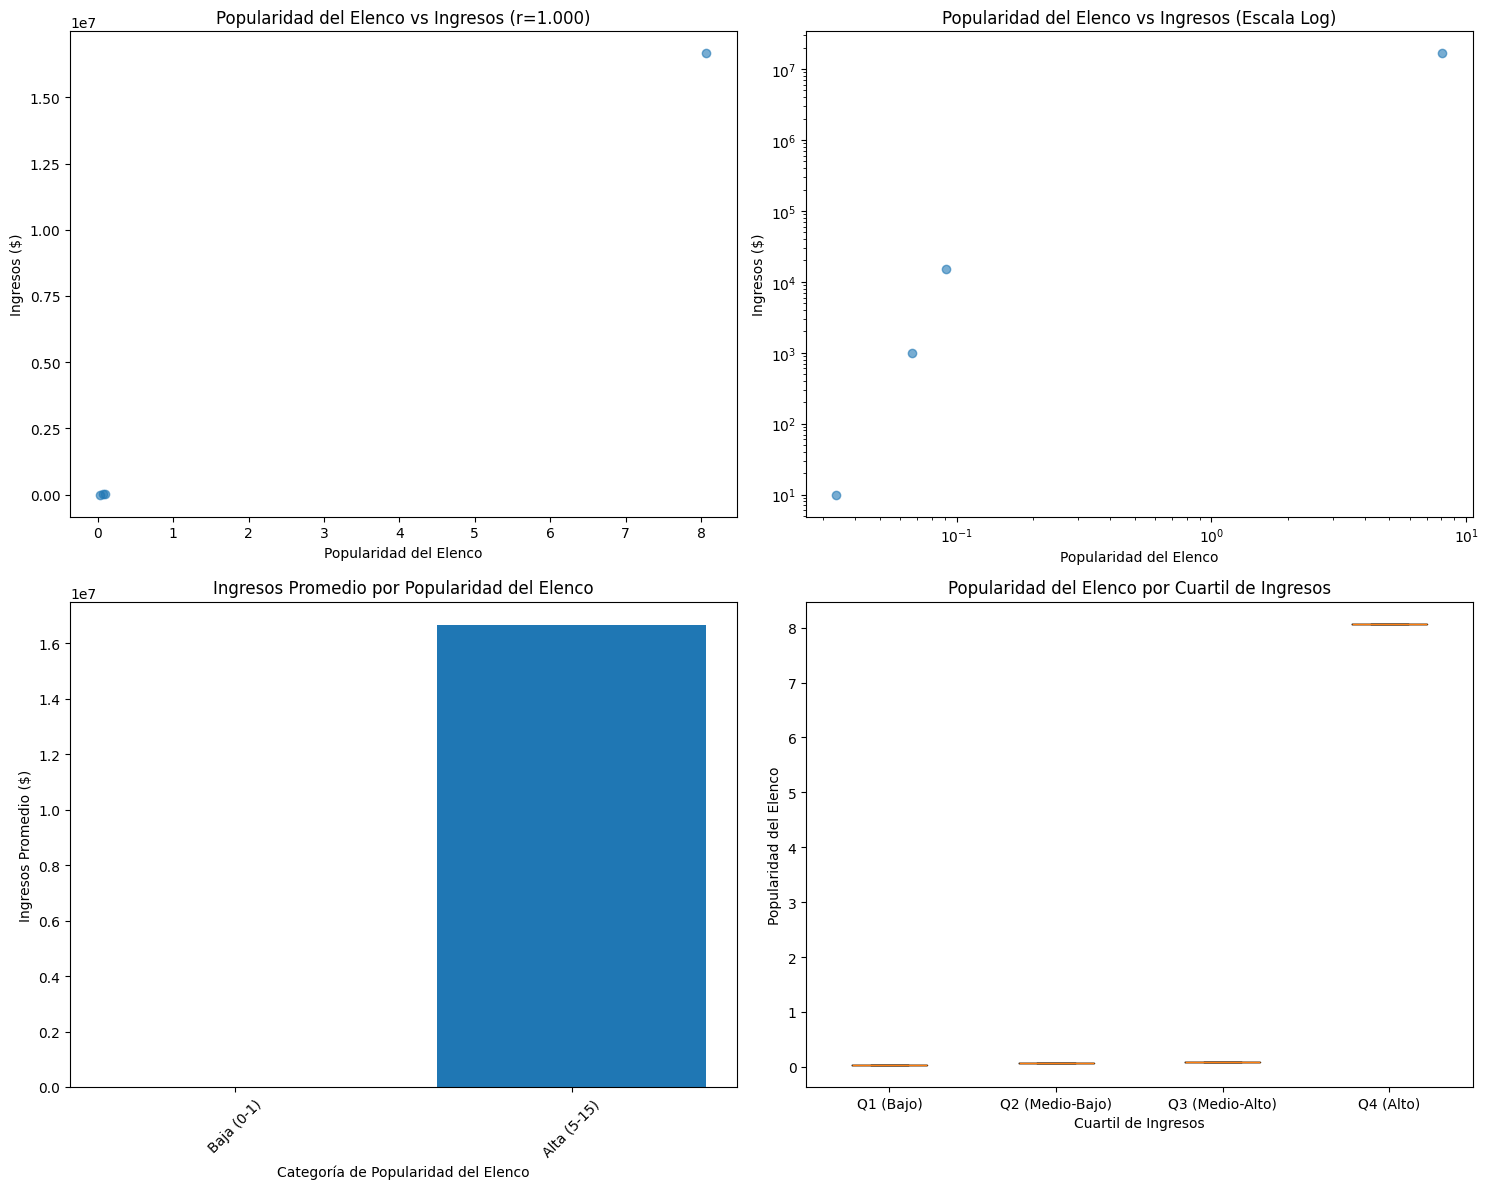


Películas con elenco muy popular (>=15):
Cantidad: 0

Comparación con películas de elenco poco popular (<=1):
Cantidad: 3
Ingresos promedio: $5,336.67


In [52]:
# 4.16. Popularidad del elenco vs éxito de taquilla
# Filtrar películas con datos completos
df['actorsPopularity'] = pd.to_numeric(df['actorsPopularity'], errors='coerce')
cast_analysis = df[(df['revenue'] > 0) & (df['actorsPopularity'].notna()) & (df['actorsPopularity'] > 0)].copy()

# Calcular correlaciones
corr_cast_revenue = cast_analysis['actorsPopularity'].corr(cast_analysis['revenue'])
corr_cast_popularity = cast_analysis['actorsPopularity'].corr(cast_analysis['popularity'])
corr_cast_votes = cast_analysis['actorsPopularity'].corr(cast_analysis['voteCount'])

print("Correlaciones entre popularidad del elenco y éxito:")
print(f"Popularidad del elenco vs Ingresos: {corr_cast_revenue:.4f}")
print(f"Popularidad del elenco vs Popularidad de la película: {corr_cast_popularity:.4f}")
print(f"Popularidad del elenco vs Número de votos: {corr_cast_votes:.4f}")

# Estadísticas básicas
print(f"\nEstadísticas básicas:")
print(f"Número de películas analizadas: {len(cast_analysis)}")
print(f"Popularidad promedio del elenco: {cast_analysis['actorsPopularity'].mean():.2f}")
print(f"Ingresos promedio: ${cast_analysis['revenue'].mean():,.2f}")

# Crear categorías de popularidad del elenco
cast_analysis['cast_popularity_category'] = pd.cut(cast_analysis['actorsPopularity'], 
                                                  bins=[0, 1, 5, 15, float('inf')], 
                                                  labels=['Baja (0-1)', 'Media (1-5)', 'Alta (5-15)', 'Muy Alta (15+)'])

revenue_by_cast_pop = cast_analysis.groupby('cast_popularity_category').agg({
    'revenue': ['mean', 'median', 'count'],
    'popularity': ['mean', 'median'],
    'voteCount': ['mean', 'median']
}).round(2)

print("\nIngresos por categoría de popularidad del elenco:")
print(revenue_by_cast_pop)

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Diagrama de dispersión: Popularidad del elenco vs Ingresos
axes[0, 0].scatter(cast_analysis['actorsPopularity'], cast_analysis['revenue'], alpha=0.6)
axes[0, 0].set_title(f'Popularidad del Elenco vs Ingresos (r={corr_cast_revenue:.3f})')
axes[0, 0].set_xlabel('Popularidad del Elenco')
axes[0, 0].set_ylabel('Ingresos ($)')

# Diagrama de dispersión con escala logarítmica
axes[0, 1].scatter(cast_analysis['actorsPopularity'], cast_analysis['revenue'], alpha=0.6)
axes[0, 1].set_title('Popularidad del Elenco vs Ingresos (Escala Log)')
axes[0, 1].set_xlabel('Popularidad del Elenco')
axes[0, 1].set_ylabel('Ingresos ($)')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')

# Gráfico de barras: Ingresos promedio por categoría de popularidad
cast_revenue_means = revenue_by_cast_pop[('revenue', 'mean')]
axes[1, 0].bar(range(len(cast_revenue_means)), cast_revenue_means.values)
axes[1, 0].set_title('Ingresos Promedio por Popularidad del Elenco')
axes[1, 0].set_xlabel('Categoría de Popularidad del Elenco')
axes[1, 0].set_ylabel('Ingresos Promedio ($)')
axes[1, 0].set_xticks(range(len(cast_revenue_means)))
axes[1, 0].set_xticklabels(cast_revenue_means.index, rotation=45)

# Diagrama de caja: Popularidad del elenco por categorías de ingresos
cast_analysis['revenue_quartile'] = pd.qcut(cast_analysis['revenue'], q=4, 
                                           labels=['Q1 (Bajo)', 'Q2 (Medio-Bajo)', 'Q3 (Medio-Alto)', 'Q4 (Alto)'])

quartiles = ['Q1 (Bajo)', 'Q2 (Medio-Bajo)', 'Q3 (Medio-Alto)', 'Q4 (Alto)']
cast_pop_data = []
quartile_labels = []
for quartile in quartiles:
    if quartile in cast_analysis['revenue_quartile'].values:
        quartile_data = cast_analysis[cast_analysis['revenue_quartile'] == quartile]['actorsPopularity']
        if len(quartile_data) > 0:
            cast_pop_data.append(quartile_data)
            quartile_labels.append(quartile)

if cast_pop_data:
    axes[1, 1].boxplot(cast_pop_data, labels=quartile_labels)
    axes[1, 1].set_title('Popularidad del Elenco por Cuartil de Ingresos')
    axes[1, 1].set_xlabel('Cuartil de Ingresos')
    axes[1, 1].set_ylabel('Popularidad del Elenco')

plt.tight_layout()
plt.show()

# Análisis de películas con elenco muy popular
high_cast_movies = cast_analysis[cast_analysis['actorsPopularity'] >= 15]
print(f"\nPelículas con elenco muy popular (>=15):")
print(f"Cantidad: {len(high_cast_movies)}")
if len(high_cast_movies) > 0:
    print(f"Ingresos promedio: ${high_cast_movies['revenue'].mean():,.2f}")
    print(f"Ingresos mediana: ${high_cast_movies['revenue'].median():,.2f}")
    
    print(f"\nTop 5 películas con elenco más popular:")
    top_cast = high_cast_movies.nlargest(5, 'actorsPopularity')
    print(top_cast[['title', 'actorsPopularity', 'revenue', 'actors']].to_string(index=False))

# Comparación con películas de bajo elenco popular
low_cast_movies = cast_analysis[cast_analysis['actorsPopularity'] <= 1]
print(f"\nComparación con películas de elenco poco popular (<=1):")
print(f"Cantidad: {len(low_cast_movies)}")
if len(low_cast_movies) > 0:
    print(f"Ingresos promedio: ${low_cast_movies['revenue'].mean():,.2f}")
    
    if len(high_cast_movies) > 0 and len(low_cast_movies) > 0:
        improvement = (high_cast_movies['revenue'].mean() / low_cast_movies['revenue'].mean() - 1) * 100
        print(f"Mejora en ingresos con elenco popular vs poco popular: {improvement:.1f}%")